## 1. التحميل والاستيراد

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [2]:
path1 = r'E:\University\وظيفة\train.csv'
path2 = r'E:\University\وظيفة\test.csv'
path3 = r'E:\University\وظيفة\sample_submission.csv'

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample_submission = pd.read_csv('sample_submission.csv')



معرفة **أبعاد البيانات** في DataFrame
(عدد الصفوف والاعمدة ضمن الداتا)



##  2. استكشاف البيانات (EDA)

In [3]:
data_train.head(10)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [3]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # تحويل الدرجات إلى راديان
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371000  # نصف قطر الأرض بالأمتار
    return c * r

data_train['trip_distance_meters'] = haversine_distance(
    data_train['pickup_latitude'], data_train['pickup_longitude'],
    data_train['dropoff_latitude'], data_train['dropoff_longitude']
)

print(data_train['trip_distance_meters'].head(10))


0    1498.520780
1    1805.507169
2    6385.098495
3    1485.498423
4    1188.588459
5    1098.942459
6    1326.278577
7    5714.980631
8    1310.353283
9    5121.161562
Name: trip_distance_meters, dtype: float64


##  3. معالجة القيم المفقودة

 تجهيز البيانات للنمذجة.


---


القيم المفقودة تسبب مشاكل في الخوارزميات
(تعويض القيم المفقودة )

 DataFrame تنظيف قبل التدريب.

In [4]:
# تعبئة القيم المفقودة في الأعمدة الفئوية والعددية

data_train['vendor_id'].fillna(data_train['vendor_id'].mode()[0], inplace=True)

data_train['store_and_fwd_flag'].fillna('N', inplace=True)

data_train['passenger_count'].fillna(data_train['passenger_count'].mode()[0], inplace=True)


التحقق من عدم وجود قيم مفقودة


In [7]:
data_train.isnull().sum()


id                      0
vendor_id               0
pickup_datetime         0
dropoff_datetime        0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
store_and_fwd_flag      0
trip_duration           0
trip_distance_meters    0
dtype: int64

##  4. استخراج السمات وتحويلها

معالجة عمود الانطلاق:تحويه الى datetime

استخراج سمات جديدة:


1.   is_weekend




In [5]:
# عم نشتغل ع عامود لحظة الانطلاق
data_train['pickup_datetime'] = pd.to_datetime(data_train['pickup_datetime'])

data_train['pickup_hour'] = data_train['pickup_datetime'].dt.hour
data_train['pickup_day'] = data_train['pickup_datetime'].dt.day
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek  # 0 = الاثنين

# Weekend flag
data_train['is_weekend'] = data_train['pickup_weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [6]:
# معالجة والعمل ع زمن الرحلة
data_train['pickup_datetime'] = pd.to_datetime(data_train['pickup_datetime'])


In [7]:
data_train['pickup_hour'] = data_train['pickup_datetime'].dt.hour              # الساعة (0 - 23)
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek     # اليوم بالأسبوع (0=الإثنين)
data_train['pickup_month'] = data_train['pickup_datetime'].dt.month           # الشهر (1 - 12)
data_train['pickup_day'] = data_train['pickup_datetime'].dt.day               # اليوم بالشهر
data_train['pickup_is_weekend'] = data_train['pickup_weekday'].isin([5,6])    # جمعة أو سبت؟


In [8]:
data_train[['pickup_datetime', 'pickup_hour', 'pickup_weekday', 'pickup_month', 'pickup_is_weekend']].head(2)


,pickup_datetime,pickup_hour,pickup_weekday,pickup_month,pickup_is_weekend
0,2016-03-14 17:24:55,17,0,3,False
1,2016-06-12 00:43:35,0,6,6,True


In [9]:
data_train[['pickup_hour', 'pickup_weekday', 'pickup_month', 'pickup_day']].describe()


,pickup_hour,pickup_weekday,pickup_month,pickup_day
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.360648e+01,3.050375e+00,3.516818e+00,1.550402e+01
std,6.399693e+00,1.954039e+00,1.681038e+00,8.703135e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,9.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00
50%,1.400000e+01,3.000000e+00,4.000000e+00,1.500000e+01
75%,1.900000e+01,5.000000e+00,5.000000e+00,2.300000e+01
max,2.300000e+01,6.000000e+00,6.000000e+00,3.100000e+01


استخراج ميزات قوية لمرحلة النمذجة.

1.سمات زمنية

2.عدد الرحلات حسب كل يوم

3.الخصائص الدورية للساعة 

4.تصنيف الاوقات

فهم السلوك الزمني للركاب والسائقين.

تحسين أي نموذج تنبؤ (Regression / Classification).

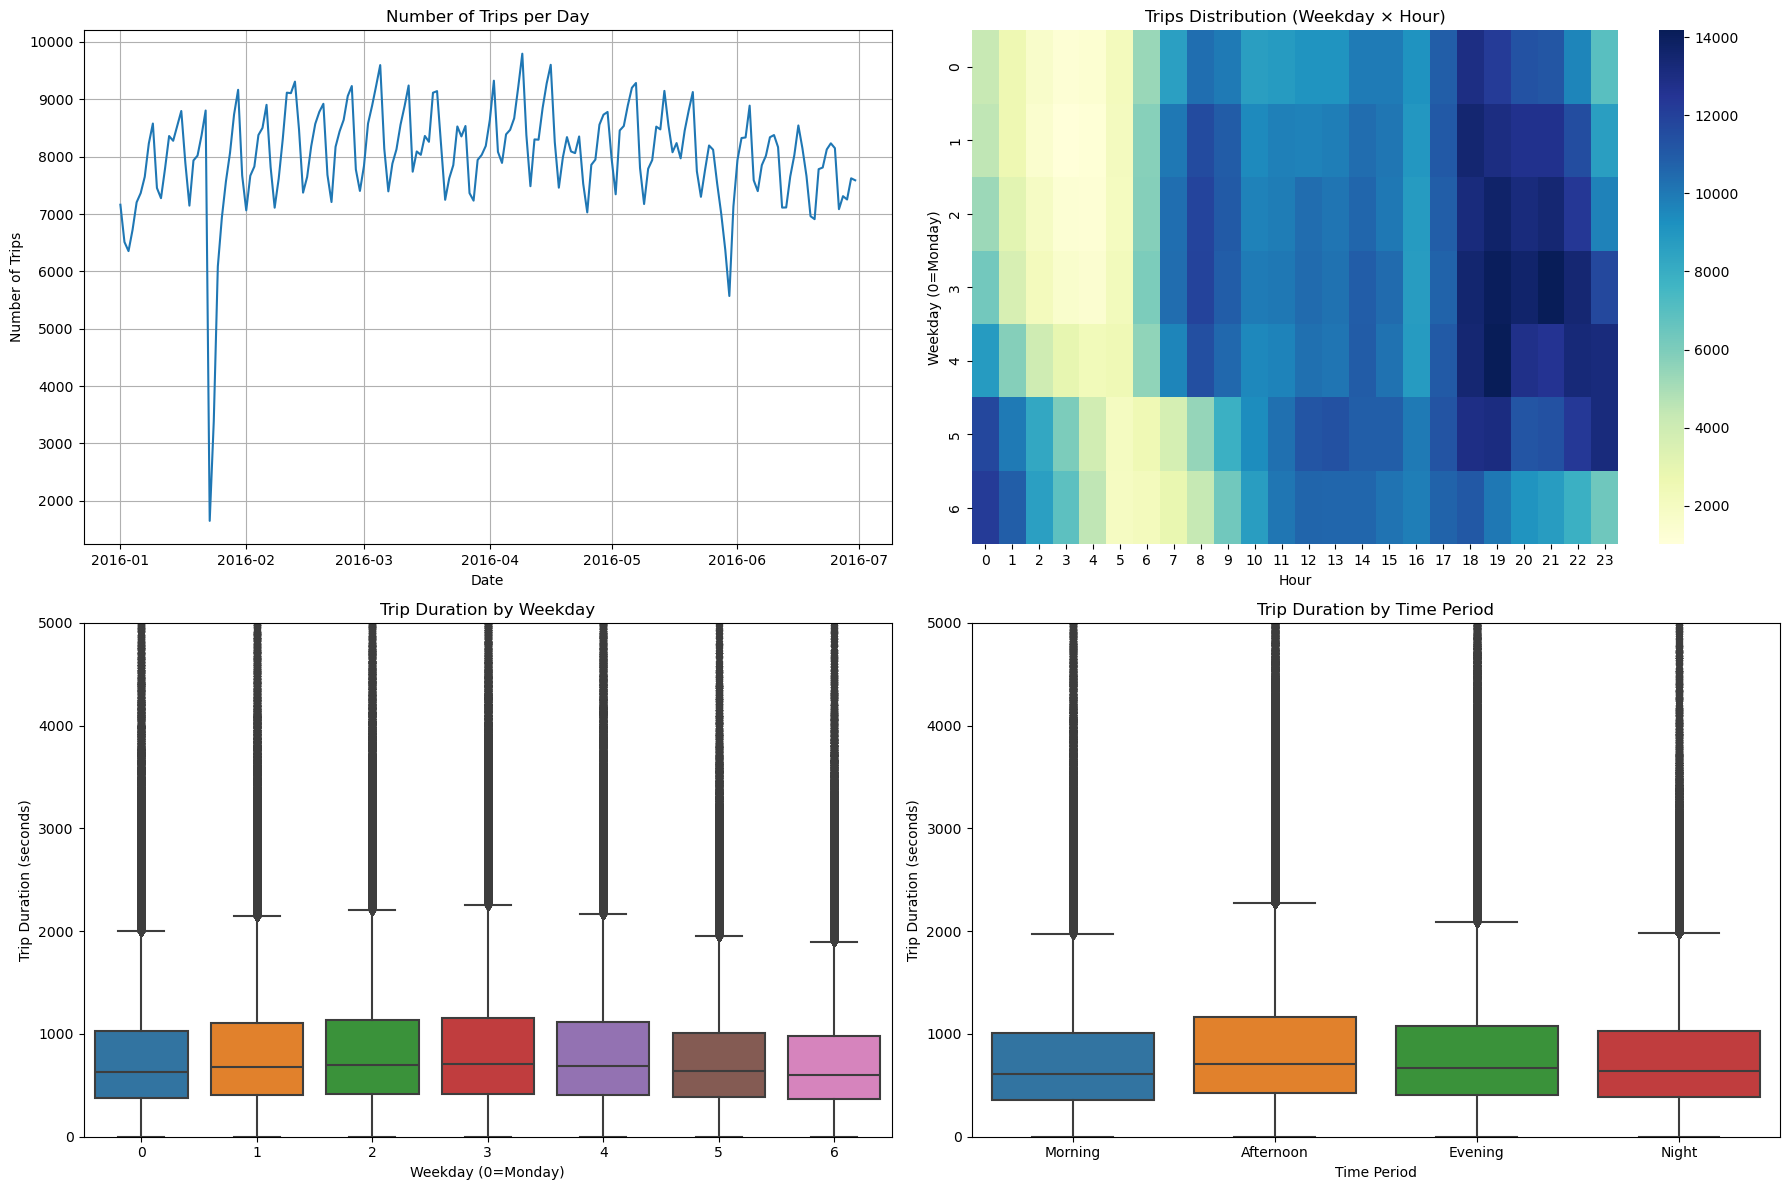

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# استخراج السمات الزمنية
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek
data_train['pickup_date'] = data_train['pickup_datetime'].dt.date

# عدد الرحلات حسب كل يوم
daily_counts = data_train.groupby('pickup_date').size()

# الخصائص الدورية للساعة
data_train['pickup_hour_sin'] = np.sin(2 * np.pi * data_train['pickup_hour'] / 24)
data_train['pickup_hour_cos'] = np.cos(2 * np.pi * data_train['pickup_hour'] / 24)

# تصنيف الوقت إلى فترات
def get_time_period(hour):
    if 5 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data_train['time_period'] = data_train['pickup_hour'].apply(get_time_period)

# الرسم
plt.figure(figsize=(18, 12))

# 1. Number of trips per day
plt.subplot(2, 2, 1)
daily_counts.plot()
plt.title("Number of Trips per Day")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)

# 2. Heatmap: Hour × Weekday
plt.subplot(2, 2, 2)
heatmap_data = data_train.groupby(['pickup_weekday', 'pickup_hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Trips Distribution (Weekday × Hour)")
plt.xlabel("Hour")
plt.ylabel("Weekday (0=Monday)")

# 3. Trip duration by weekday
plt.subplot(2, 2, 3)
sns.boxplot(x='pickup_weekday', y='trip_duration', data=data_train)
plt.title("Trip Duration by Weekday")
plt.xlabel("Weekday (0=Monday)")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, 5000)

# 4. Trip duration by time period
plt.subplot(2, 2, 4)
sns.boxplot(x='time_period', y='trip_duration', data=data_train, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Trip Duration by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, 5000)

plt.tight_layout()
plt.show()


In [11]:
# نحدد المتغير الهدف
target = 'trip_duration'

# نختار بعض السمات المحتملة
features = [
    'passenger_count',
    'trip_distance_meters',
    'pickup_hour',
    'pickup_weekday',
    'pickup_latitude',
    'pickup_longitude',
    'dropoff_latitude',
    'dropoff_longitude'
]

X = data_train[features]
y = data_train[target]


Using Random Forest Regressor 
1. تحديد الهدف والمتغيرات المهمة
2. فصل الميزات والهدف
3. تقسيم البيانات للتدريب والاختبار
4. تدريب نموذج Random Forest
5. استخراج أهمية الميزات
 6. رسم أهمية الميزات

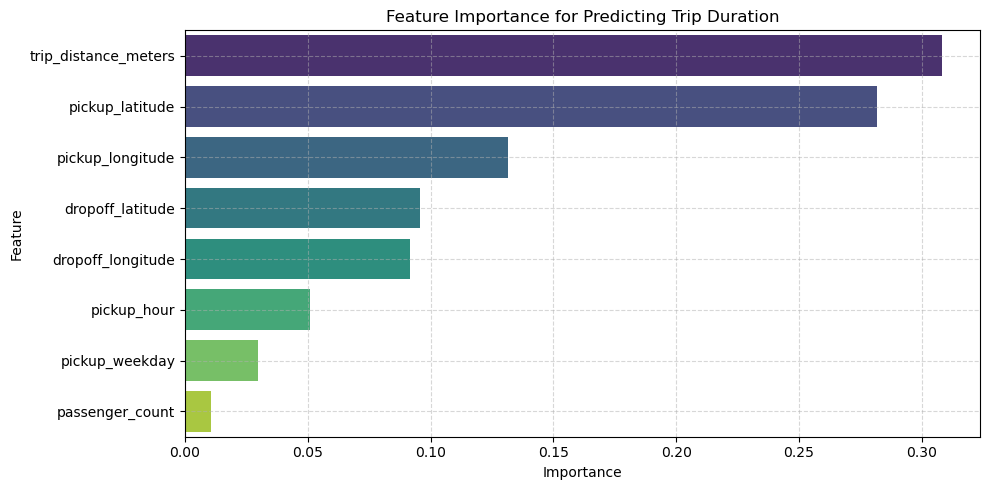

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نموذج Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# استخراج الأهمية
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# رسم
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting Trip Duration")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


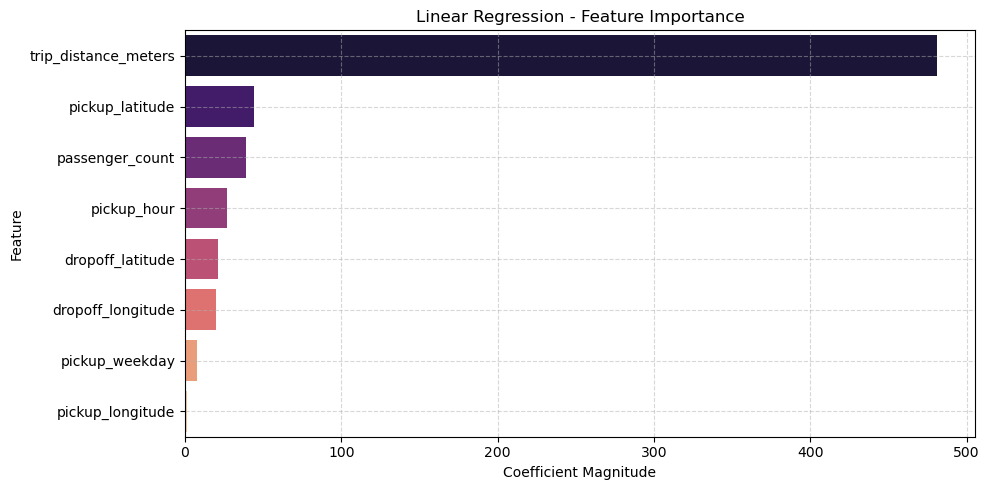

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# توحيد الميزات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تدريب نموذج الانحدار الخطي
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# استخراج المعاملات كأهمية
importance_df_lr = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(lr_model.coef_)  # نأخذ القيمة المطلقة لأن بعض القيم قد تكون سالبة
}).sort_values(by='Importance', ascending=False)

# رسم الأهمية
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df_lr, palette='magma')
plt.title("Linear Regression - Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


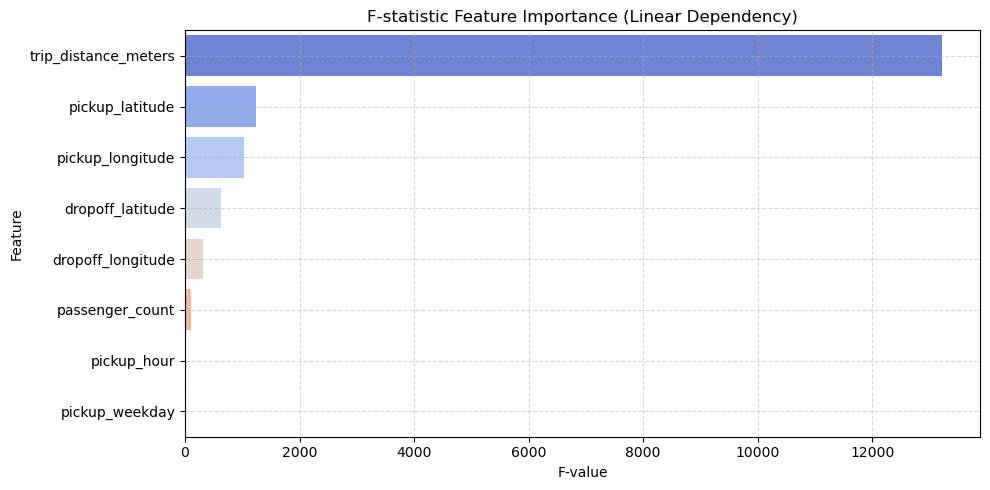

In [27]:
from sklearn.feature_selection import f_regression

f_values, p_values = f_regression(X, y)

importance_df_f = pd.DataFrame({
    'Feature': features,
    'F_value': f_values
}).sort_values(by='F_value', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='F_value', y='Feature', data=importance_df_f, palette='coolwarm')
plt.title("F-statistic Feature Importance (Linear Dependency)")
plt.xlabel("F-value")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
def clean_data(df, feature_cols, target_col):
    df = df.dropna(subset=feature_cols + [target_col])

    def remove_outliers_iqr(df, col):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

    for col in ['trip_distance_meters', 'trip_duration']:
        df = remove_outliers_iqr(df, col)

    return df

# الأعمدة
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

data_clean = clean_data(data_train, feature_cols, target_col)


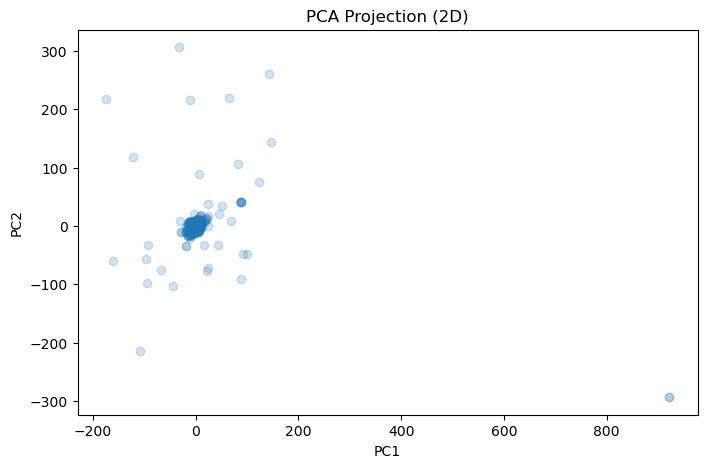

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# تجهيز البيانات
features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude','pickup_hour', 'pickup_weekday']
X_scaled = StandardScaler().fit_transform(data_train[features])

# تطبيق PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# رسم نتائج PCA
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.title('PCA Projection (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [13]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection
X = data_train[features]
y = data_train['trip_duration']
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# عرض النتائج
feature_scores = pd.DataFrame({'Feature': features, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False)


,Feature,Score
1,trip_distance_meters,13221.214696
4,pickup_latitude,1245.138961
5,pickup_longitude,1028.325049
6,dropoff_latitude,623.863542
7,dropoff_longitude,314.331689
0,passenger_count,104.676213
2,pickup_hour,19.864648
3,pickup_weekday,0.730159


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# --- 1. تحديد الأعمدة ---
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = ColumnTransformer([
    ('scale_features', StandardScaler(), feature_cols)
])

pipeline = Pipeline([
    ('scaling', scaler),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Model R^2 Score: {score:.4f}")


Model R^2 Score: 0.6081


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(n_estimators=300, learning_rate=0.03, random_state=42))
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Improved GB R^2 Score: {score:.4f}")


Improved GB R^2 Score: 0.5512


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# اختيار الأعمدة المستخدمة
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# تقسيم الميزات والهدف
X = data_clean[feature_cols]
y = data_clean[target_col]

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء بايبلاين مع Decision Tree
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=10, random_state=42))  # ممكن تعدل العمق حسب الحاجة
])

# تدريب النموذج
pipeline.fit(X_train, y_train)

# تقييم الأداء
score = pipeline.score(X_test, y_test)
print(f"Decision Tree R^2 Score: {score:.4f}")


Decision Tree R^2 Score: 0.5592


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# الأعمدة المستخدمة
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# تقسيم البيانات
X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# بايبلاين مع SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.2))  # فيك تعدل المعاملات حسب التجربة
])

# تدريب النموذج
pipeline.fit(X_train, y_train)

# تقييم النموذج
score = pipeline.score(X_test, y_test)
print(f"SVR R^2 Score: {score:.4f}")


In [59]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# الأعمدة المستخدمة
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# تقسيم البيانات
X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# بايبلاين مع LinearSVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearSVR(epsilon=1.0, C=1.0, random_state=42, max_iter=10000))
])

# تدريب النموذج
pipeline.fit(X_train, y_train)

# تقييم النموذج
score = pipeline.score(X_test, y_test)
print(f"Linear SVR R^2 Score: {score:.4f}")


Linear SVR R^2 Score: 0.4552


In [40]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# نفس البيانات المستخدمة سابقًا
X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج CatBoost
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    verbose=100,
    random_state=42
)

cat_model.fit(X_train, y_train)

# التنبؤ والنتائج
y_pred = cat_model.predict(X_test)

print("📊 CatBoost Performance:")
print("  RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("  MAE :", mean_absolute_error(y_test, y_pred))
print("  R²  :", r2_score(y_test, y_pred))


0:	learn: 366.3343107	total: 338ms	remaining: 2m 48s
100:	learn: 247.0896538	total: 14s	remaining: 55.3s
200:	learn: 241.7691704	total: 26.8s	remaining: 39.9s
300:	learn: 239.4103568	total: 39.5s	remaining: 26.1s
400:	learn: 237.8646812	total: 52.2s	remaining: 12.9s
499:	learn: 236.7894978	total: 1m 4s	remaining: 0us
📊 CatBoost Performance:
  RMSE: 237.6246219845319
  MAE : 178.6487777125405
  R²  : 0.6011719935503466


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| الخطوة               | النوع          | فائدتها                     |
| -------------------- | -------------- | --------------------------- |
| استخدام `Pool`       | داخلي          | تحسين الأداء وأهمية الميزات |
| `RandomizedSearchCV` | ضبط النموذج    | أسرع من GridSearch          |
| `log1p(y)`           | معالجة الهدف   | تخفيف انحراف القيم          |
| Feature Engineering  | تحسين المدخلات | استخراج سمات ذات معنى       |
| Outlier Removal      | تنظيف البيانات | التخلص من الحالات المتطرفة  |


In [41]:
feature_names = X_train.columns


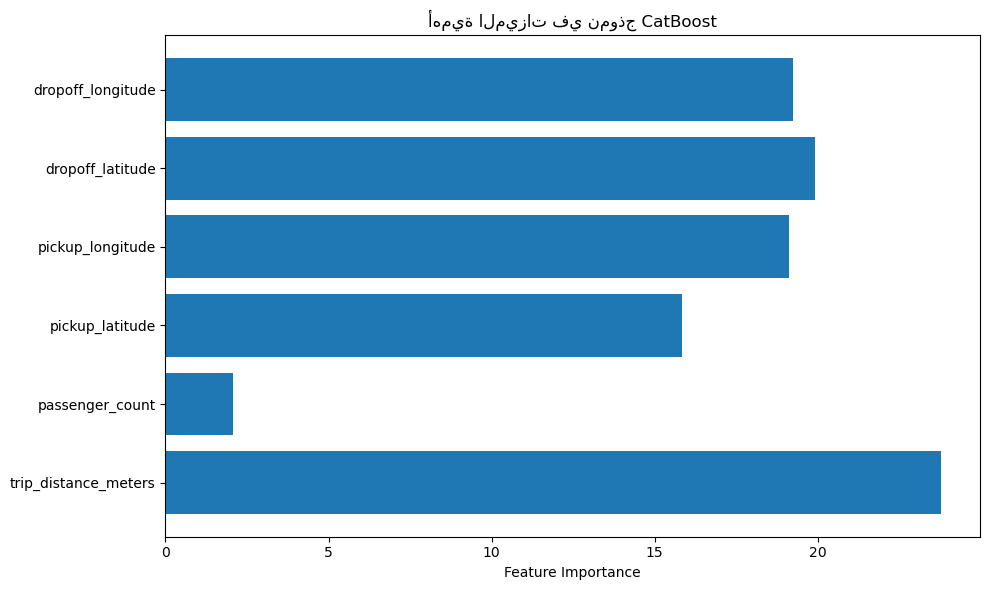

In [68]:

import matplotlib.pyplot as plt
import numpy as np

# استخراج الأهمية
feature_importance = cat_best.get_feature_importance()
feature_names = X_train.columns  # استخدم الأعمدة مباشرة من البيانات

# تأكد من التطابق
assert len(feature_importance) == len(feature_names), "❌ عدد الميزات لا يطابق عدد القيم!"

# رسم الأهمية
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("أهمية الميزات في نموذج CatBoost")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


In [14]:
def haversine(lat1, lon1, lat2, lon2):
    import numpy as np
    R = 6371  # km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

data_clean['haversine_distance'] = haversine(
    data_clean['pickup_latitude'], data_clean['pickup_longitude'],
    data_clean['dropoff_latitude'], data_clean['dropoff_longitude']
)

# ثم أضفها للميزات
feature_cols.append('haversine_distance')


In [19]:
# === 1. إعداد البيانات للتدريب ===

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# تحديد الميزات (X) والهدف (y)
features = ['passenger_count', 'pickup_hour', 'pickup_day', 'pickup_weekday', 'is_weekend']
X = data_clean[features]
y = data_clean['trip_duration']

# تقسيم البيانات
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# توحيد الميزات (مهم لـ Linear Regression و XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === 2. تدريب النماذج ===

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# نموذج الانحدار الخطي
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_val_scaled)

# نموذج شجرة القرار
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_val)

# نموذج الغابة العشوائية
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

# نموذج XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_val_scaled)

# === 3. تقييم النماذج ===

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("🔍 RMSE لكل نموذج:")
print(f"Linear Regression: {rmse(y_val, lr_preds):.2f}")
print(f"Decision Tree:     {rmse(y_val, dt_preds):.2f}")
print(f"Random Forest:     {rmse(y_val, rf_preds):.2f}")
print(f"XGBoost:           {rmse(y_val, xgb_preds):.2f}")


🔍 RMSE لكل نموذج:
Linear Regression: 375.17
Decision Tree:     373.08
Random Forest:     372.82
XGBoost:           369.46


استخراج سمات جديدة من الإحداثيات والوقت.

حساب المسافة بين نقطتي الالتقاط والتوصيل (Haversine distance).

تحديث بيانات التدريب بهذه السمات.

إعادة تدريب نموذج XGBoost ومقارنة الأداء.


In [15]:
import numpy as np

# حساب المسافة بين الإحداثيات باستخدام Haversine
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # نصف قطر الأرض بالكيلومتر
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    return R * 2 * np.arcsin(np.sqrt(a))

# استخراج السمات من الوقت
data_train['pickup_minute'] = data_train['pickup_datetime'].dt.minute
data_train['pickup_month'] = data_train['pickup_datetime'].dt.month

# حساب المسافة الفعلية
data_train['distance_km'] = haversine_distance(
    data_train['pickup_latitude'],
    data_train['pickup_longitude'],
    data_train['dropoff_latitude'],
    data_train['dropoff_longitude']
)

# حذف القيم الشاذة من الرحلات الطويلة جدًا (>3 ساعات)
data_train = data_train[data_train['trip_duration'] < 10800]

# السمات النهائية الجديدة
features_updated = [
    'passenger_count', 'pickup_hour', 'pickup_day', 'pickup_weekday', 'is_weekend',
    'pickup_minute', 'pickup_month', 'distance_km'
]

# إعادة تقسيم البيانات وتوحيدها
X = data_train[features_updated]
y = data_train['trip_duration']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# إعادة تدريب XGBoost على السمات المحسنة
import xgboost as xgb

xgb_improved = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_improved.fit(X_train_scaled, y_train)
xgb_preds = xgb_improved.predict(X_val_scaled)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print(f" RMSE بعد تحسين السمات: {rmse(y_val, xgb_preds):.2f}")


 RMSE بعد تحسين السمات: 343.36


 حذف السمات الأقل أهمية (is_weekend و passenger_count)

In [16]:
# إزالة السمات ذات التأثير المنخفض حسب تحليل SHAP
features_reduced = [
    'pickup_hour', 'pickup_day', 'pickup_weekday', 'pickup_minute',
    'pickup_month', 'distance_km'
]

X = data_train[features_reduced]
y = data_train['trip_duration']

# إعادة التقسيم والتوحيد
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# إعادة تدريب XGBoost بعد تقليص السمات
xgb_reduced = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_reduced.fit(X_train_scaled, y_train)
y_pred_reduced = xgb_reduced.predict(X_val_scaled)

print(f"🗑️ RMSE بعد حذف السمات الضعيفة: {rmse(y_val, y_pred_reduced):.2f}")


🗑️ RMSE بعد حذف السمات الضعيفة: 343.24


تحويل pickup_hour إلى تمثيل دائري (sin/cos)
لأن الوقت يتكرر كل 24 ساعة، هذا يساعد النماذج في فهم العلاقات الدورية

 إضافة سمة is_night_ride 

In [17]:
data_train['is_night_ride'] = data_train['pickup_hour'].apply(lambda h: int(h >= 22 or h <= 5))


In [18]:
# تحويل الساعة إلى تمثيل دائري (ساعة = زاوية)
data_train['pickup_hour_sin'] = np.sin(2 * np.pi * data_train['pickup_hour'] / 24)
data_train['pickup_hour_cos'] = np.cos(2 * np.pi * data_train['pickup_hour'] / 24)


In [19]:
features_enhanced = [
    'pickup_day', 'pickup_weekday', 'pickup_minute', 'pickup_month',
    'distance_km', 'is_night_ride', 
    'pickup_hour_sin', 'pickup_hour_cos',
    'trip_distance_meters',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]


##  5. تحليل التوزيع والقيم الشاذة

رسم توزيع مدة الرحلات( Histogram )


---

ك** **(outliers)**يف تتوزع مدة الرحلات**: هل معظمها قصيرة؟ طويلة؟ هل فيها قيم شاذة ؟

C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


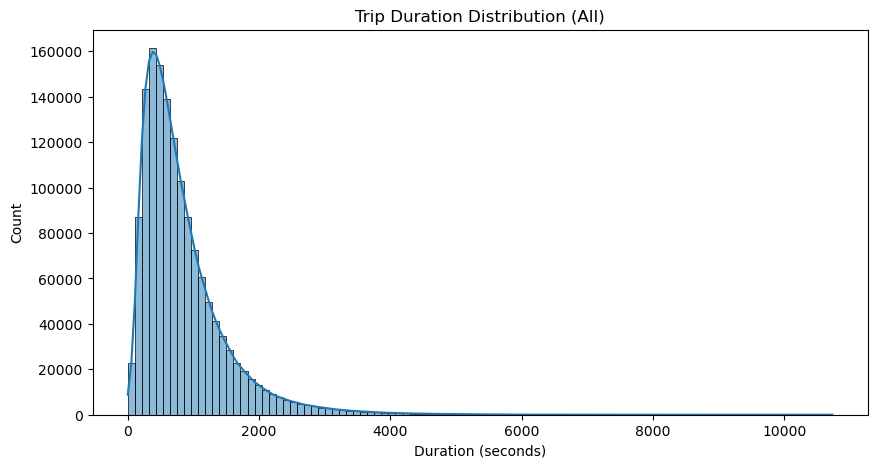

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data_train['trip_duration'], bins=100, kde=True)
plt.title('Trip Duration Distribution (All)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()



التركيز فقط على الرحلات التي مدتها أقل من ساعتين (7200 ثانية).
---


هو تنظيف التحليل البصري، لأن التوزيع الكامل غالبًا يحتوي على قيم شاذة جدًا
(رحلات طويلة جدًا) تشوّه الشكل.

بتحديد المدة إلى أقل من 7200 ثانية:

C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


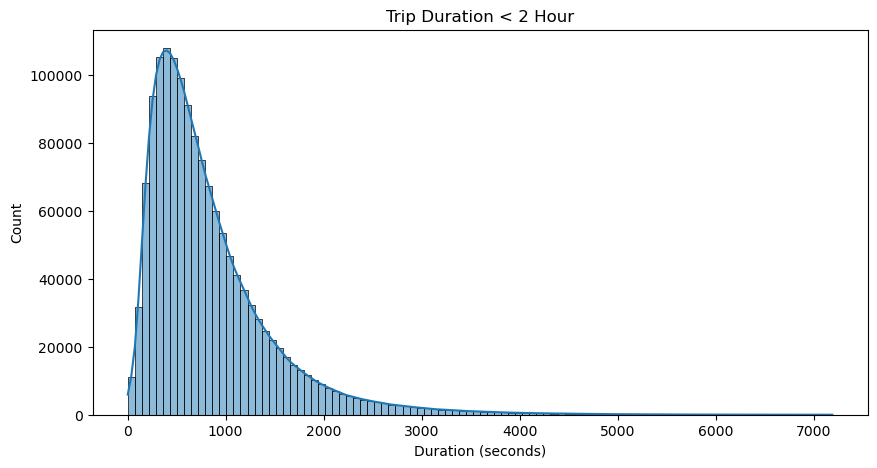

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data_train[data_train['trip_duration'] < 7200]['trip_duration'], bins=100, kde=True)
plt.title('Trip Duration < 2 Hour')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()


يعطي فكرة عن توزيع البيانات حسب الشركات.

هل يوجد انحياز لنموذج شركة معينة؟


C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


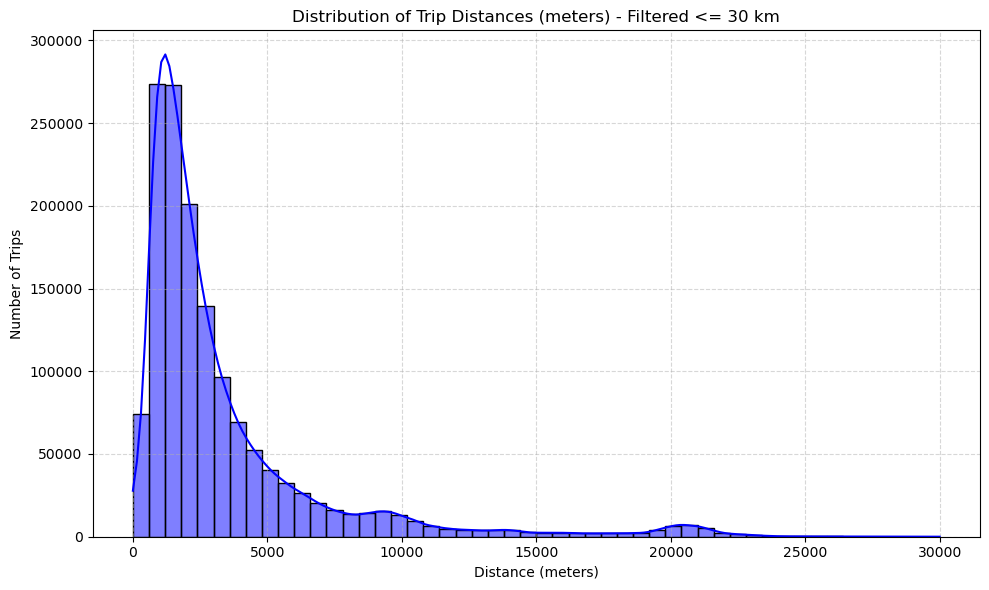

In [22]:
max_distance = 30000  # 30 كيلومتر

plt.figure(figsize=(10,6))
sns.histplot(data_train[data_train['trip_distance_meters'] <= max_distance]['trip_distance_meters'],
             bins=50, kde=True, color='blue')

plt.title('Distribution of Trip Distances (meters) - Filtered <= 30 km')
plt.xlabel('Distance (meters)')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


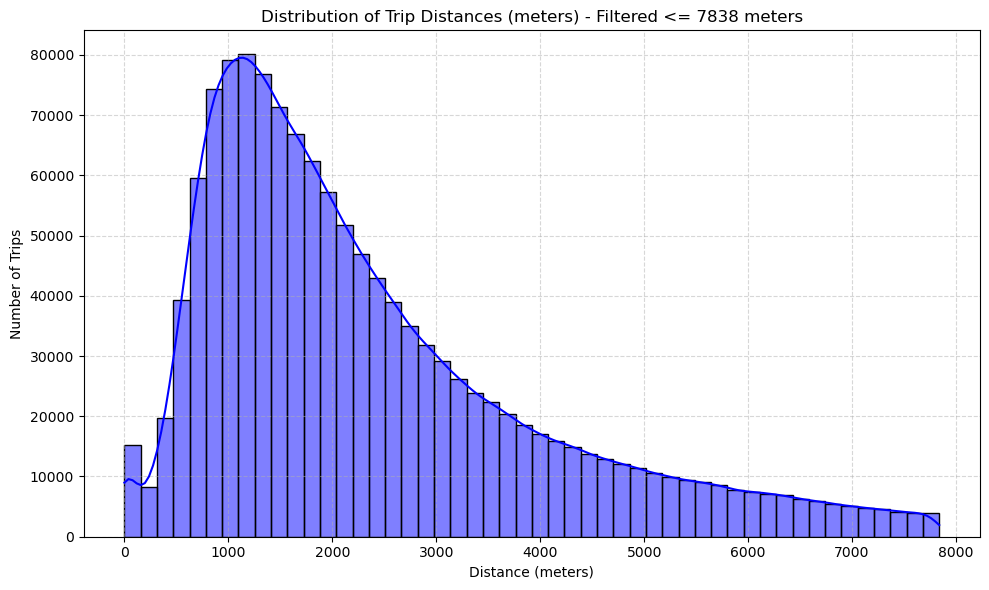

Upper bound (cut-off) for outliers based on IQR: 7838.36 meters


In [23]:
Q1 = data_train['trip_distance_meters'].quantile(0.25)
Q3 = data_train['trip_distance_meters'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10,6))
sns.histplot(data_train[data_train['trip_distance_meters'] <= upper_bound]['trip_distance_meters'],
             bins=50, kde=True, color='blue')

plt.title(f'Distribution of Trip Distances (meters) - Filtered <= {int(upper_bound)} meters')
plt.xlabel('Distance (meters)')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Upper bound (cut-off) for outliers based on IQR: {upper_bound:.2f} meters")


C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


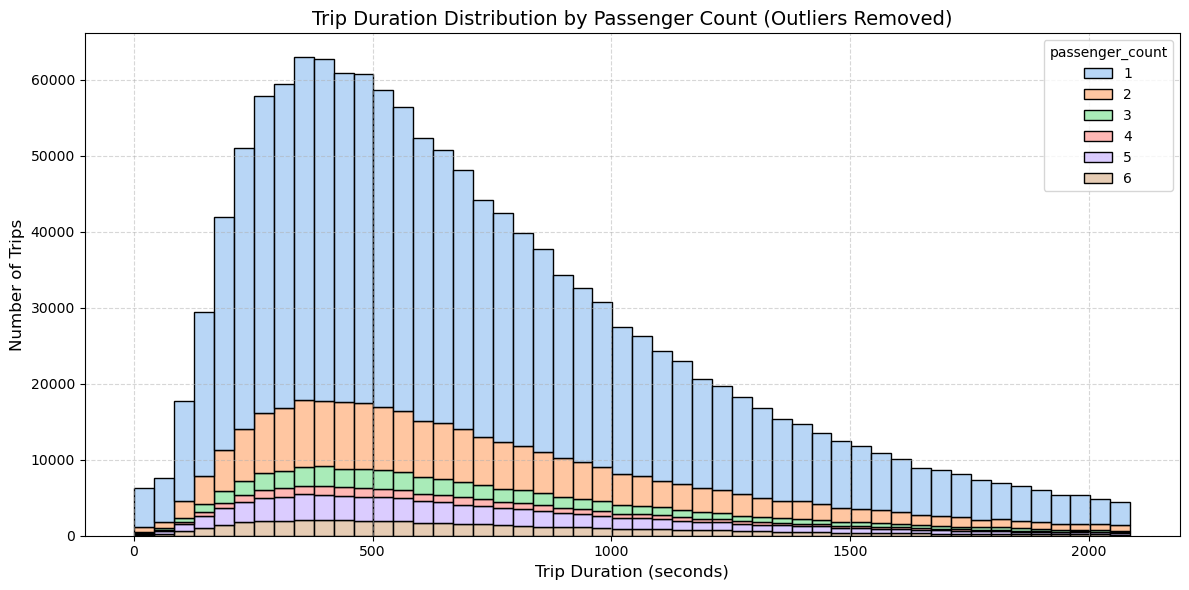

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب حدود القيم الشاذة
Q1 = data_train['trip_duration'].quantile(0.25)
Q3 = data_train['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# تصفية البيانات بدون القيم الشاذة
filtered_data = data_train[
    (data_train['trip_duration'] >= lower_bound) &
    (data_train['trip_duration'] <= upper_bound)
]

# تحديد عدد ركاب معقولين (من 1 إلى 6)
filtered_data = filtered_data[filtered_data['passenger_count'].isin(range(1, 7))]

# رسم Histogram ملوّن بألوان pastel حسب عدد الركاب
plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data,
    x='trip_duration',
    hue='passenger_count',
    bins=50,
    multiple='stack',
    palette='pastel'  # تغيير الألوان
)

plt.title('Trip Duration Distribution by Passenger Count (Outliers Removed)', fontsize=14)
plt.xlabel('Trip Duration (seconds)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


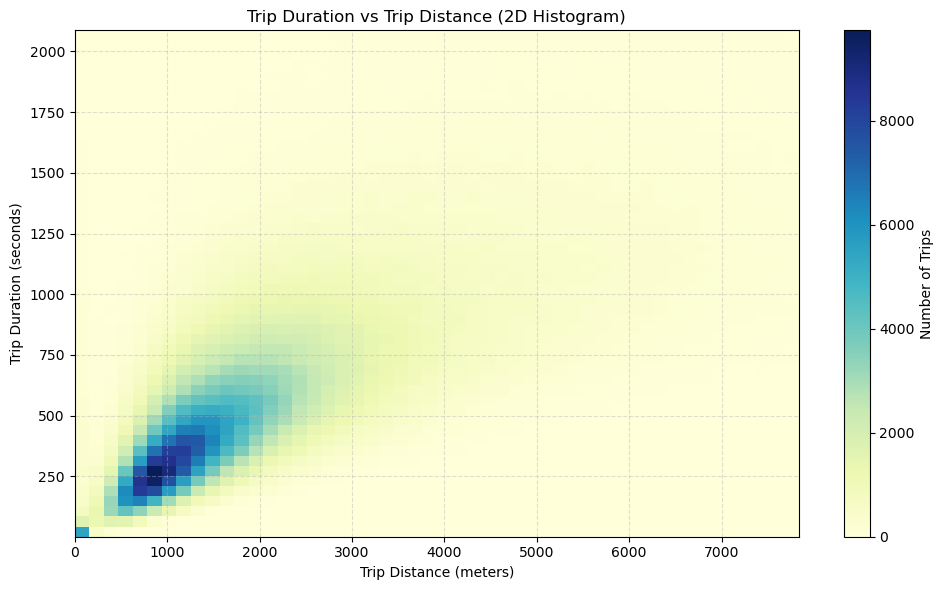

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# إزالة القيم الشاذة من trip_duration و trip_distance_meters
Q1_duration = data_train['trip_duration'].quantile(0.25)
Q3_duration = data_train['trip_duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
duration_min = Q1_duration - 1.5 * IQR_duration
duration_max = Q3_duration + 1.5 * IQR_duration

Q1_dist = data_train['trip_distance_meters'].quantile(0.25)
Q3_dist = data_train['trip_distance_meters'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
dist_min = Q1_dist - 1.5 * IQR_dist
dist_max = Q3_dist + 1.5 * IQR_dist

# تصفية البيانات
filtered_data = data_train[
    (data_train['trip_duration'] >= duration_min) &
    (data_train['trip_duration'] <= duration_max) &
    (data_train['trip_distance_meters'] >= dist_min) &
    (data_train['trip_distance_meters'] <= dist_max)
]

# رسم مخطط 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(
    filtered_data['trip_distance_meters'],
    filtered_data['trip_duration'],
    bins=50,
    cmap='YlGnBu'
)

plt.colorbar(label='Number of Trips')
plt.title('Trip Duration vs Trip Distance (2D Histogram)')
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


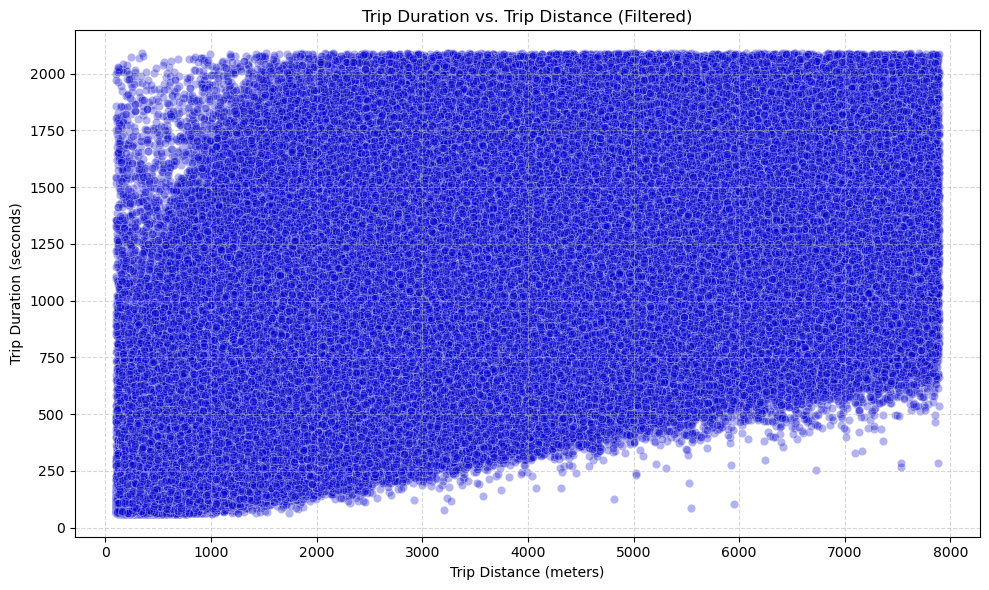

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# حذف القيم غير المنطقية (صفر أو قريبة من الصفر)
filtered_data = data_train[
    (data_train['trip_duration'] > 60) &  # أكتر من 60 ثانية
    (data_train['trip_distance_meters'] > 100)  # أكتر من 100 متر
]

# حساب IQR لـ trip_duration
Q1_duration = filtered_data['trip_duration'].quantile(0.25)
Q3_duration = filtered_data['trip_duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
duration_min = Q1_duration - 1.5 * IQR_duration
duration_max = Q3_duration + 1.5 * IQR_duration

# حساب IQR لـ trip_distance_meters
Q1_dist = filtered_data['trip_distance_meters'].quantile(0.25)
Q3_dist = filtered_data['trip_distance_meters'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
dist_min = Q1_dist - 1.5 * IQR_dist
dist_max = Q3_dist + 1.5 * IQR_dist

# تصفية القيم الشاذة
filtered_data = filtered_data[
    (filtered_data['trip_duration'] >= duration_min) &
    (filtered_data['trip_duration'] <= duration_max) &
    (filtered_data['trip_distance_meters'] >= dist_min) &
    (filtered_data['trip_distance_meters'] <= dist_max)
]

# رسم scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='mediumblue'
)

plt.title('Trip Duration vs. Trip Distance (Filtered)')
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x600 with 0 Axes>

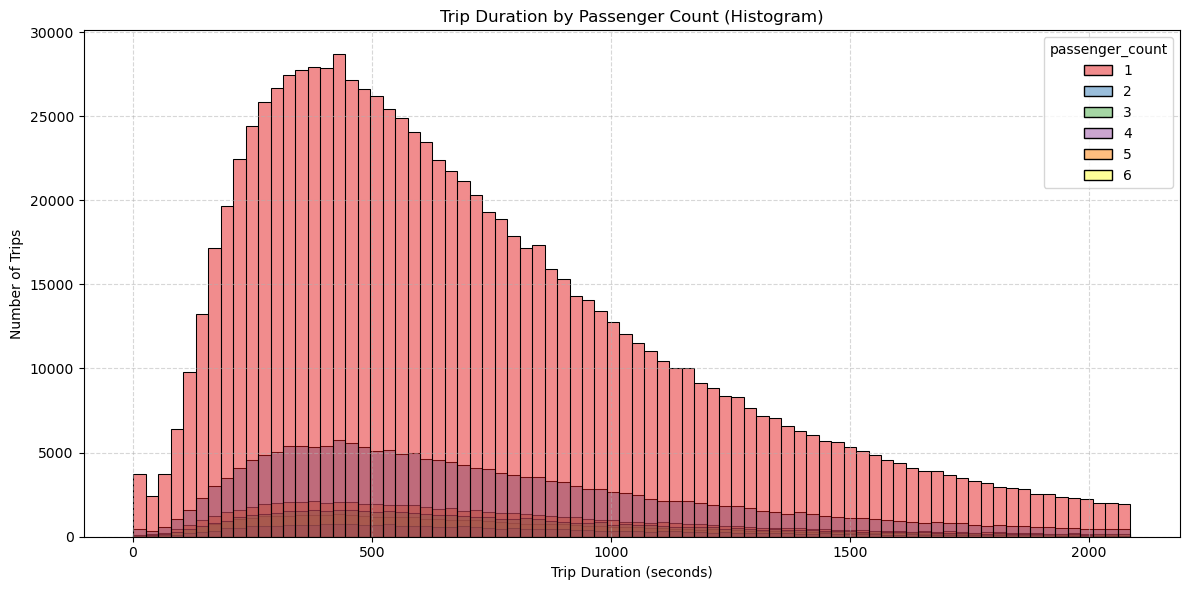

C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


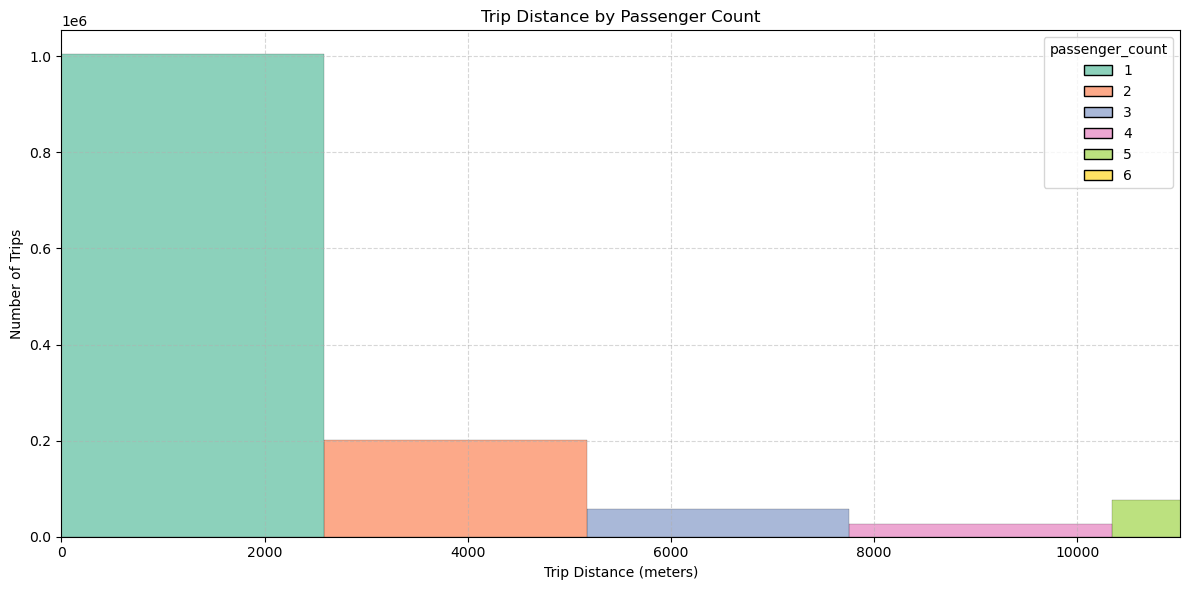

In [27]:

plt.figure(figsize=(14, 6))

# مدة الرحلة حسب عدد الركاب
import matplotlib.pyplot as plt
import seaborn as sns

# تحديد البيانات بين 1 و 6 ركّاب وإزالة القيم الشاذة للمدة
filtered_data = data_train[
    (data_train['passenger_count'].between(1, 6)) &
    (data_train['trip_duration'] <= data_train['trip_duration'].quantile(0.95))
]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data,
    x='trip_duration',
    hue='passenger_count',
    bins=80,
    kde=False,
    palette='Set1',
    multiple='layer'  # كل فئة فوق التانية بشفافية
)

plt.title("Trip Duration by Passenger Count (Histogram)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Number of Trips")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




# مسافة الرحلة حسب عدد الركاب


plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_train[data_train['passenger_count'].between(1, 6)],
    x='trip_distance_meters',
    hue='passenger_count',
    bins=80,
    kde=False,
    palette='Set2',
    multiple='dodge'  # فصل الهستوغرام لكل فئة
)
plt.title("Trip Distance by Passenger Count")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Number of Trips")
plt.xlim(0, data_train['trip_distance_meters'].quantile(0.95))  # إزالة التطرفات
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




##  6. اختيار السمات واختزال الأبعاد

تطبيق PCA

# كود تحليل PCA

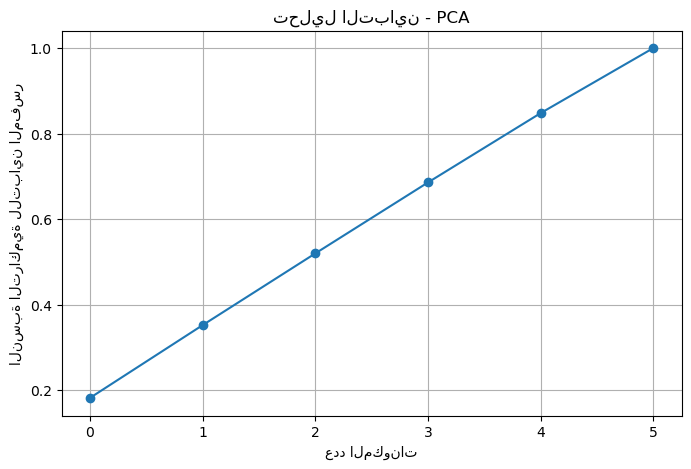

🔎 RMSE بعد PCA (XGBoost): 366.04


In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# تطبيق PCA بعد Standardization
pca = PCA(n_components=None)
pca.fit(X_train_scaled)

# عرض نسبة التباين المفسر لكل مكون
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('عدد المكونات')
plt.ylabel('النسبة التراكمية للتباين المفسر')
plt.title('تحليل التباين - PCA')
plt.grid(True)
plt.show()

# اختيار عدد مناسب من المكونات (مثلاً التي تفسر 95% من التباين)
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_val_pca = pca_95.transform(X_val_scaled)

# تدريب نموذج XGBoost على البيانات بعد PCA
xgb_pca_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_pca_model.fit(X_train_pca, y_train)
xgb_pca_preds = xgb_pca_model.predict(X_val_pca)

# تقييم الأداء
print(f"🔎 RMSE بعد PCA (XGBoost): {rmse(y_val, xgb_pca_preds):.2f}")


# Time Series

In [35]:
data_clean['pickup_datetime'] = pd.to_datetime(data_clean['pickup_datetime'], errors='coerce')

data_clean['date'] = data_clean['pickup_datetime'].dt.date
data_clean['date'] = pd.to_datetime(data_clean['date'])

daily_df = data_clean.groupby('date').agg({
    'id': 'count',
    'trip_duration': 'mean',
    'trip_distance_meters': 'mean',
    'passenger_count': 'mean'
}).rename(columns={'id': 'trip_count'})


In [36]:
rolling_mean = daily_df['trip_count'].rolling(window=3, center=True).mean()
daily_df['trip_count_fixed'] = daily_df['trip_count'].copy()

for i in range(len(daily_df)):
    if daily_df['trip_count'].iloc[i] < 1000 and pd.notna(rolling_mean.iloc[i]):
        daily_df['trip_count_fixed'].iloc[i] = rolling_mean.iloc[i]


In [37]:
rolling_mean = daily_df['trip_count'].rolling(window=3, center=True).mean()
daily_df['trip_count_fixed'] = daily_df['trip_count'].copy()
threshold = 5000
trip_median = daily_df['trip_count'].median()
for i in range(len(daily_df)):
    if daily_df['trip_count'].iloc[i] < threshold:
        date_index = daily_df.index[i]
        if pd.notna(rolling_mean.loc[date_index]):
            daily_df.at[date_index, 'trip_count_fixed'] = rolling_mean.loc[date_index]
        else:
            daily_df.at[date_index, 'trip_count_fixed'] = trip_median


C:\Users\Abdulrahman\AppData\Local\Temp\ipykernel_29868\1738351629.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4130.666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  daily_df.at[date_index, 'trip_count_fixed'] = rolling_mean.loc[date_index]


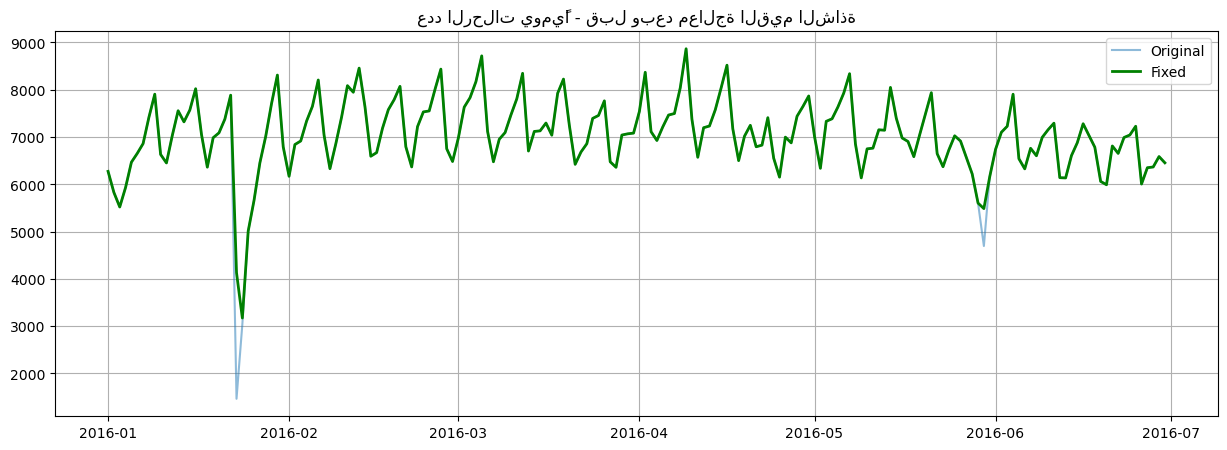

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(daily_df.index, daily_df['trip_count'], label='Original', alpha=0.5)
plt.plot(daily_df.index, daily_df['trip_count_fixed'], label='Fixed', linewidth=2, color='green')
plt.title('عدد الرحلات يوميًا - قبل وبعد معالجة القيم الشاذة')
plt.legend()
plt.grid(True)
plt.show()


In [37]:

trip_counts = pd.Series({
    '2016-01-23': 1465,
    '2016-01-24': 3043,
    '2016-05-30': 4695,
    '2016-01-25': 5010,
    '2016-01-03': 5520
})
smallest_5 = trip_counts.nsmallest(5)

trip_counts_cleaned = trip_counts.drop(smallest_5.index)

print(trip_counts_cleaned)


Series([], dtype: int64)


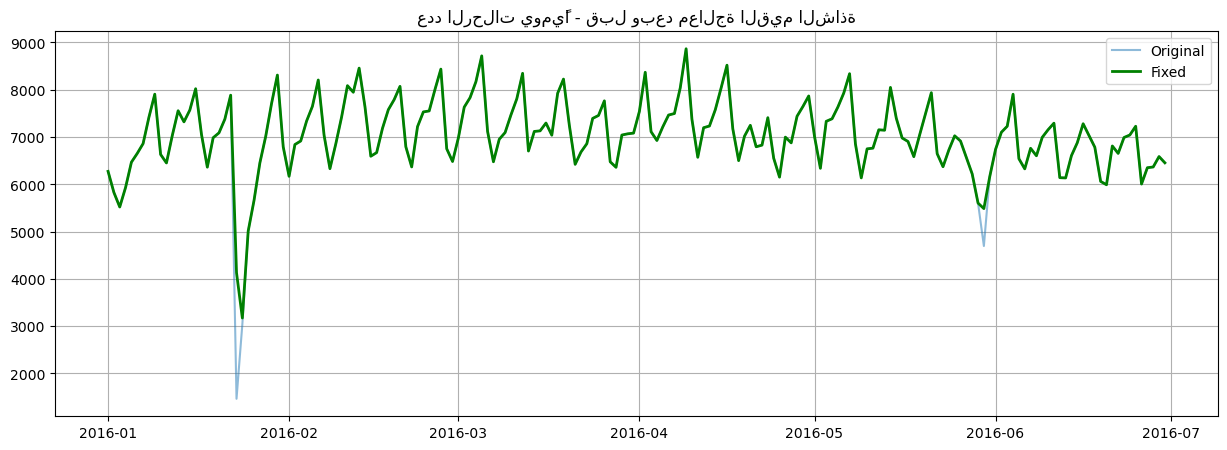

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(daily_df.index, daily_df['trip_count'], label='Original', alpha=0.5)
plt.plot(daily_df.index, daily_df['trip_count_fixed'], label='Fixed', linewidth=2, color='green')
plt.title('عدد الرحلات يوميًا - قبل وبعد معالجة القيم الشاذة')
plt.legend()
plt.grid(True)
plt.show()


<Axes: title={'center': 'متوسط مدة الرحلة'}, xlabel='date'>

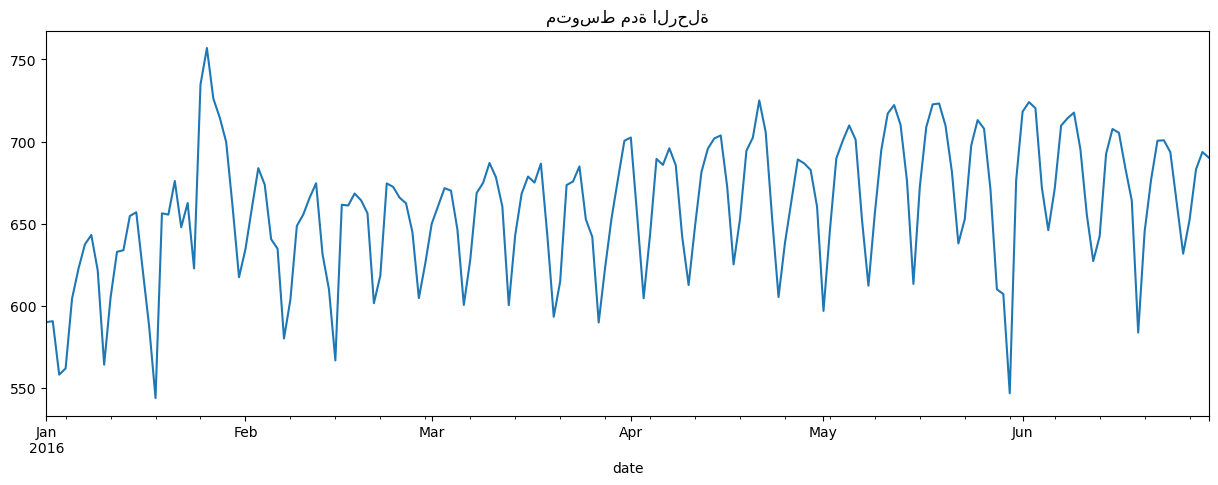

In [39]:
daily_df['trip_duration'].plot(figsize=(15,5), title='متوسط مدة الرحلة')


<Axes: title={'center': 'متوسط المسافة اليومية'}, xlabel='date'>

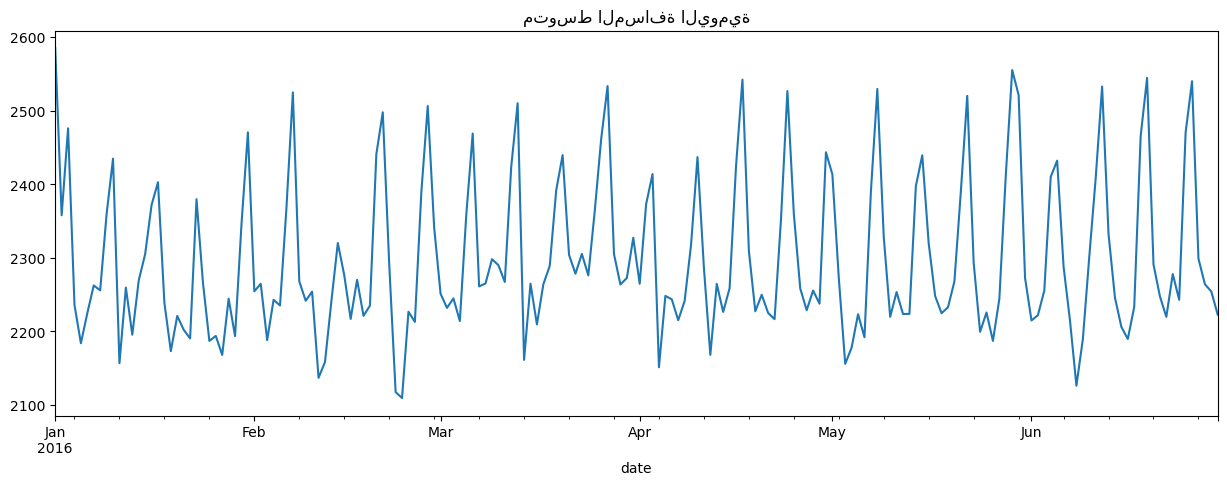

In [40]:
daily_df['trip_distance_meters'].plot(figsize=(15,5), title='متوسط المسافة اليومية')


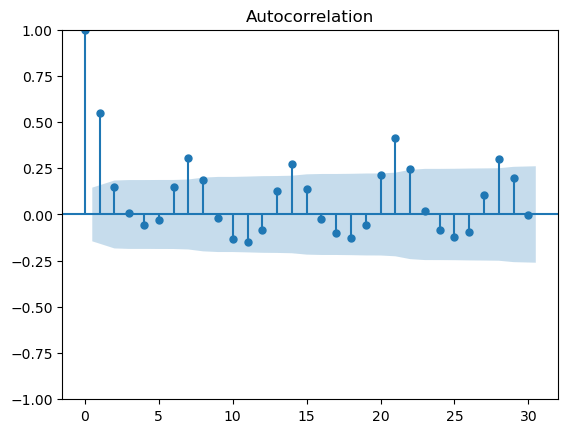

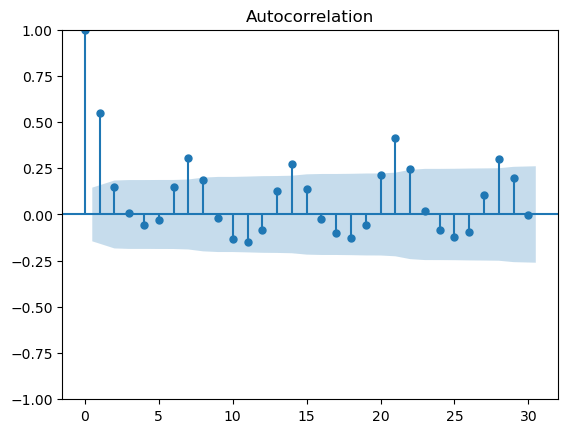

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(daily_df['trip_count'].dropna(), lags=30)


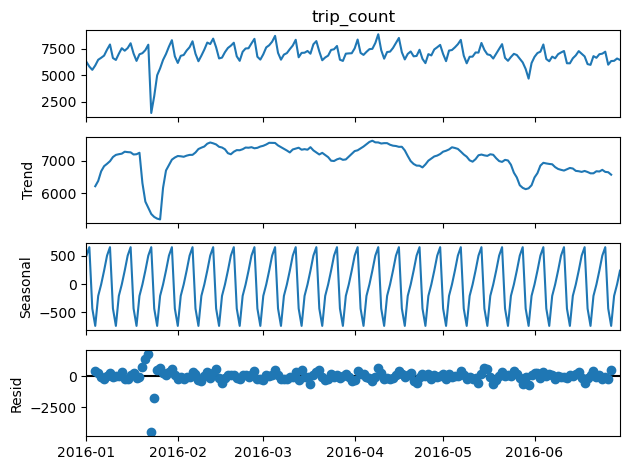

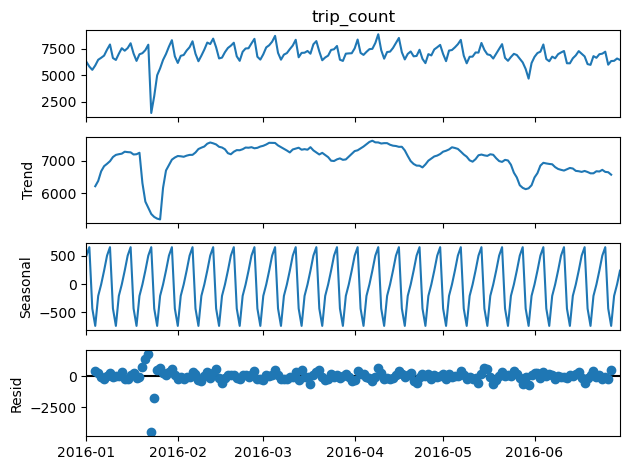

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_df['trip_count'], model='additive', period=7)
result.plot()


##  7. تقسيم البيانات وتطبيق النماذج

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05, 0.1],
    'iterations': [300, 500],
    'l2_leaf_reg': [1, 3, 5],
}

cat_model = CatBoostRegressor(loss_function='RMSE', verbose=0, random_state=42)

grid = GridSearchCV(cat_model, param_grid=params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("📌 أفضل معاملات:")
print(grid.best_params_)

# التقييم
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

params = {
    'depth': randint(6, 12),
    'learning_rate': uniform(0.01, 0.2),
    'iterations': [300, 500, 700],
    'l2_leaf_reg': randint(1, 10)
}

cat_model = CatBoostRegressor(loss_function='RMSE', verbose=0, random_state=42)

rand_search = RandomizedSearchCV(cat_model, param_distributions=params, n_iter=20,
                                 scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, random_state=42)
rand_search.fit(X_train, y_train)

print("🔍 أفضل توليفة من RandomizedSearch:")
print(rand_search.best_params_)


🔍 أفضل توليفة من RandomizedSearch:
{'depth': 11, 'iterations': 700, 'l2_leaf_reg': 9, 'learning_rate': 0.20223440486986985}


In [65]:
import numpy as np

y_log = np.log1p(y)  # log(1 + x)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

cat_model_log = CatBoostRegressor(**rand_search.best_params_, verbose=100)
cat_model_log.fit(X_train_log, y_train_log)

y_pred_log = cat_model_log.predict(X_test_log)
y_pred_original = np.expm1(y_pred_log)

# تقييم على النسخة الأصلية
print("📈 تقييم بعد تحويل اللوغاريتمي:")
print("RMSE:", mean_squared_error(y_test, y_pred_original, squared=False))


0:	learn: 0.6108106	total: 222ms	remaining: 2m 35s
100:	learn: 0.4118763	total: 19.2s	remaining: 1m 53s
200:	learn: 0.4031468	total: 38.4s	remaining: 1m 35s
300:	learn: 0.3977839	total: 57.4s	remaining: 1m 16s
400:	learn: 0.3930282	total: 1m 16s	remaining: 57.3s
500:	learn: 0.3897913	total: 1m 36s	remaining: 38.2s
600:	learn: 0.3867296	total: 1m 55s	remaining: 19s
699:	learn: 0.3841216	total: 2m 14s	remaining: 0us
📈 تقييم بعد تحويل اللوغاريتمي:
RMSE: 235.93181762273096


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# إعادة تدريب النموذج
cat_best = CatBoostRegressor(
    depth=11,
    iterations=700,
    learning_rate=0.20223440486986985,
    l2_leaf_reg=9,
    loss_function='RMSE',
    verbose=100,
    random_state=42
)

cat_best.fit(X_train, y_train)

# التنبؤ
y_pred_best = cat_best.predict(X_test)

# تقييم الأداء
rmse = mean_squared_error(y_test, y_pred_best, squared=False)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("✅ CatBoost Final Model Performance:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE : {mae:.2f}")
print(f"  R²  : {r2:.4f}")


0:	learn: 338.6136678	total: 439ms	remaining: 5m 6s
100:	learn: 234.9053571	total: 27.2s	remaining: 2m 41s
200:	learn: 231.5713875	total: 57.4s	remaining: 2m 22s
300:	learn: 229.5703898	total: 1m 26s	remaining: 1m 54s
400:	learn: 227.9872639	total: 1m 51s	remaining: 1m 23s
500:	learn: 226.5349302	total: 2m 16s	remaining: 54.2s
600:	learn: 225.3024723	total: 2m 44s	remaining: 27.1s
699:	learn: 224.2079714	total: 3m 12s	remaining: 0us
✅ CatBoost Final Model Performance:
  RMSE: 231.01
  MAE : 172.09
  R²  : 0.6231


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import gc
from sklearn.linear_model import LogisticRegression

# تقليل حجم النماذج لتقليل استهلاك الذاكرة
cat_model = CatBoostRegressor(
    depth=8,
    iterations=300,
    learning_rate=0.15,
    l2_leaf_reg=9,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

xgb = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    random_state=42
)

# نموذج Stacking مبسط
stack = StackingRegressor(
    estimators=[
        ('cat', cat_model),
        ('xgb', xgb),
        ('rf', rf)
    ],
    final_estimator=Ridge(),
    n_jobs=1  # تشغيل تسلسلي لتقليل الذاكرة
)

# تنظيف الذاكرة
gc.collect()

# تدريب النموذج
stack.fit(X_train, y_train)

# التنبؤ
y_pred_stack = stack.predict(X_test)

# التقييم
print("📦 Stacked Model Performance:")
print("  ✅ RMSE:", mean_squared_error(y_test, y_pred_stack, squared=False))
print("  ✅ R²  :", r2_score(y_test, y_pred_stack))


📦 Stacked Model Performance:
  ✅ RMSE: 235.64870240409664
  ✅ R²  : 0.607777164484791


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# إعداد شبكة أبسط لتقليل استهلاك الذاكرة
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],  # إزالة None لتفادي استهلاك كبير للذاكرة
    'min_samples_split': [2, 5]
}

# استخدام نواة واحدة بدلاً من كل الأنوية
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=1  # ✅ استخدام معالج واحد فقط لتقليل الضغط على الذاكرة
)

grid_search.fit(X_train, y_train)

print("أفضل المعاملات:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits


بدل Stacking → استخدم VotingRegressor

In [50]:
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
import gc

# نموذج مبسط من CatBoost لتقليل الضغط على الذاكرة
cat_model = CatBoostRegressor(
    depth=6,
    iterations=300,
    learning_rate=0.1,
    l2_leaf_reg=5,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

# تنظيف الذاكرة قبل التدريب
gc.collect()

# نموذج التصويت
voting = VotingRegressor([
    ('cat', cat_model),
    ('xgb', xgb),
    ('rf', rf)
])

voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

print("🤝 Voting Model Performance:")
print("  ✅ RMSE:", mean_squared_error(y_test, y_pred_voting, squared=False))
print


🤝 Voting Model Performance:
  ✅ RMSE: 241.73179067662034


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [55]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators=10000,
    learning_rate=0.1,
    max_depth=9,
    random_state=42
)

lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("🌿 LightGBM Performance:")
print("  ✅ RMSE:", mean_squared_error(y_test, y_pred_lgb, squared=False))
print("  ✅ R²  :", r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 1022004, number of used features: 6
[LightGBM] [Info] Start training from score 660.063956
🌿 LightGBM Performance:
  ✅ RMSE: 230.82598874314678
  ✅ R²  : 0.6236671072474462


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
# 🔧 خلية 2: تحسين أداء XGBoost باستخدام GridSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200]
}

grid_model = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_model.fit(X_train_scaled, y_train)

print("✅ أفضل معاملات:", grid_model.best_params_)

# تقييم النموذج الأفضل
best_model = grid_model.best_estimator_
y_pred_best = best_model.predict(X_val_scaled)

print(f"📉 RMSE للنموذج المحسن (GridSearchCV): {rmse(y_val, y_pred_best):.2f}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
✅ أفضل معاملات: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}


TypeError: 'numpy.float64' object is not callable

##  8. تحسين النماذج وتحليل الأداء

 1. ضبط المعاملات (Hyperparameter Tuning)
  باستخدام GridSearchCV

تحليل residuals (أخطاء التنبؤ)

##  9. الخاتمة والنتائج

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [4]:
data_train.shape

(1458644, 11)

حساب عدد الركاب ضمن الرحلات


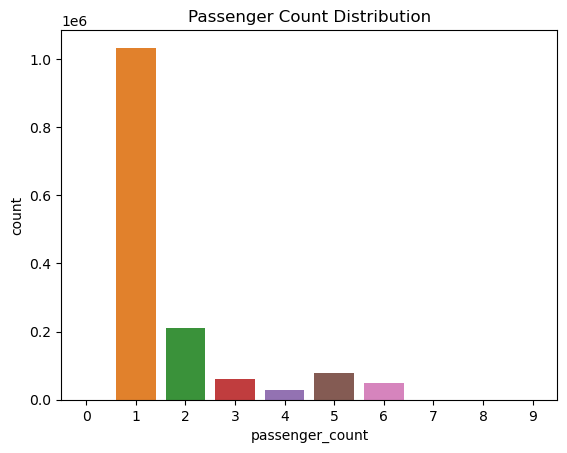

In [11]:
sns.countplot(x='passenger_count', data=data_train)
plt.title('Passenger Count Distribution')
plt.show()


In [12]:
print(data_train['passenger_count'].value_counts())


passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64


حساب عدد الرحلات بالساعات :

معرفة أوقات الذروة اليومية

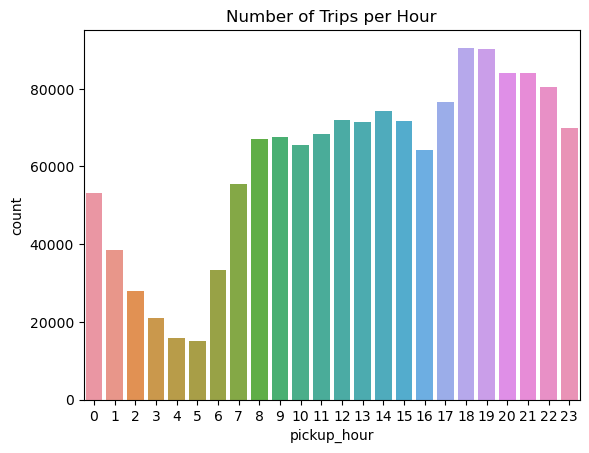

In [14]:
sns.countplot(x='pickup_hour', data=data_train)
plt.title('Number of Trips per Hour')
plt.show()


عدد الرحلات حسب يوم الأسبوع:

تحليل نمط الأيام: عطل مقابل دوام

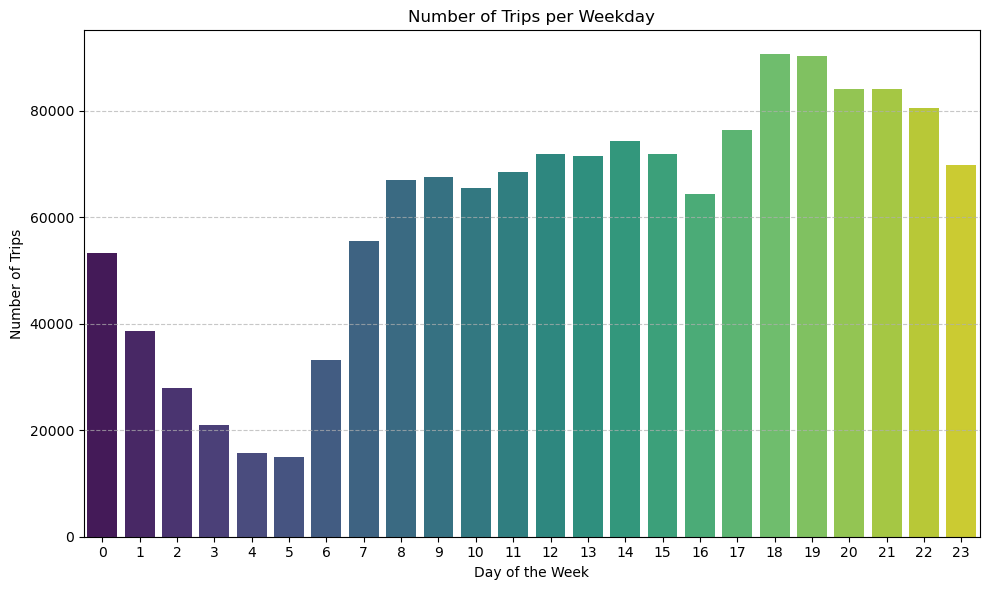

In [15]:

# خريطة الأعمدة (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=data_train, palette='viridis')


plt.title('Number of Trips per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


عدد الرحلات في كل يوم من الشهر:
متابعة النشاط الشهري

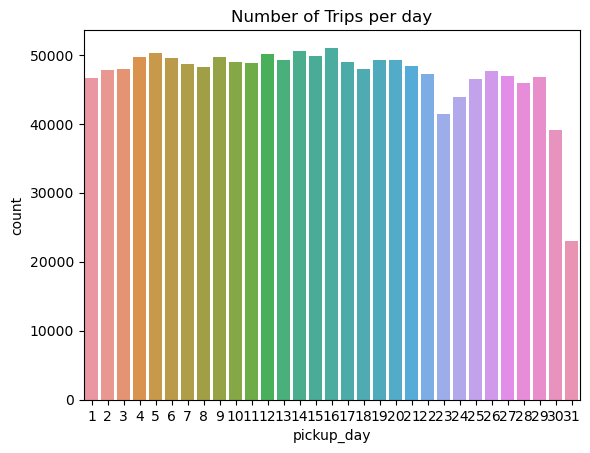

In [16]:
sns.countplot(x='pickup_day', data=data_train)
plt.title('Number of Trips per day')
plt.show()


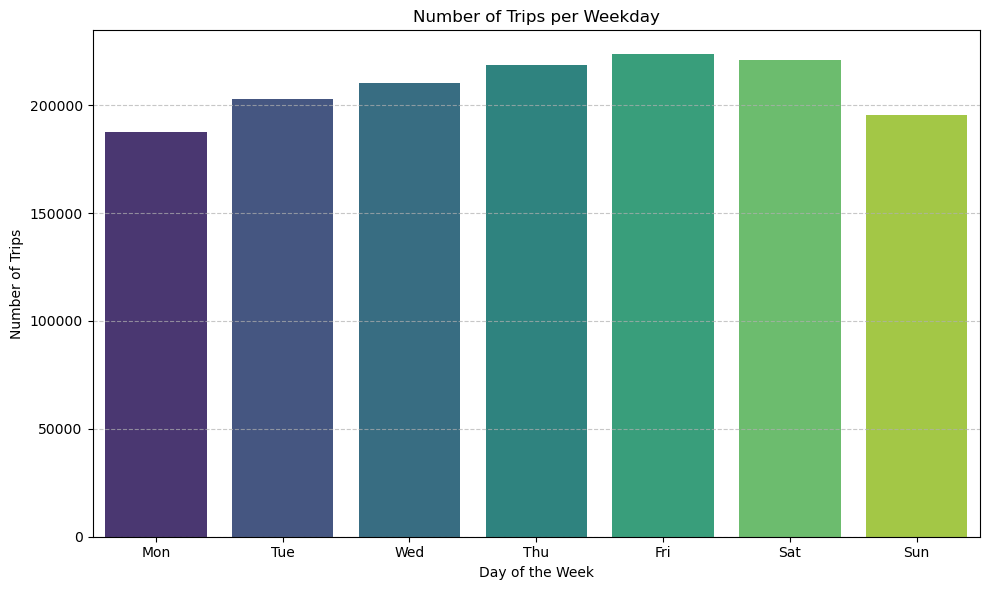

In [17]:

# خريطة الأعمدة (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_weekday', data=data_train, palette='viridis')

# تسمية الأيام بدل الأرقام
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

plt.title('Number of Trips per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
unique_vendors = data_train['vendor_id'].unique()
unique_vendors


array([2, 1], dtype=int64)

In [19]:

vendor_counts = data_train['vendor_id'].value_counts()


print("أكتر شركة (vendor_id) تكراراً:")
print(vendor_counts)


print("\nأكتر شركة تكراراً هي:")
print(vendor_counts.idxmax(), "بعدد =", vendor_counts.max())


أكتر شركة (vendor_id) تكراراً:
vendor_id
2    780302
1    678342
Name: count, dtype: int64

أكتر شركة تكراراً هي:
2 بعدد = 780302


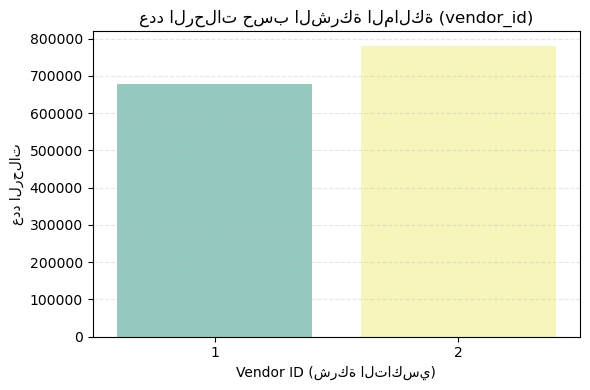

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='vendor_id', data=data_train, palette='Set3')

plt.title('عدد الرحلات حسب الشركة المالكة (vendor_id)')
plt.xlabel('Vendor ID (شركة التاكسي)')
plt.ylabel('عدد الرحلات')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


تعرف مدى المسافات الفعلية للرحلات.

تكشف عن الرحلات الشاذة (مثلاً مسافة 0 أو فوق 100 كم).

يمكن استخدام trip_distance_meters كميزة (feature) مهمة لتوقع مدة الرحلة أو الأجرة.

حولنا عمود pickup_datetime لتاريخ ووقت حقيقي

حتى نقدر نستخرج منه معلومات.


استخرجنا خصائص زمنية مثل:

pickup_hour: الساعة (مثلاً 8 صباحًا)

pickup_weekday: اليوم بالأسبوع (مثلاً الجمعة)

pickup_month: الشهر

pickup_is_weekend: هل الرحلة بعطلة نهاية الأسبوع؟

رسمنا مخططات:

توزع الرحلات حسب الساعة

حسب أيام الأسبوع

حسب الأشهر

** الهدف من كل ما سبق**

نفهم متى يكون الطلب على الرحلات أعلى.

نستخدم هذه المعلومات كـ ميزات (features) مفيدة في نماذج التوقع.

نكتشف أنماط الازدحام أو العطل اللي تأثر على الرحلة.

In [28]:
print(data_train['pickup_hour'].value_counts().sort_index())

print(data_train['pickup_weekday'].value_counts().sort_index())

print(data_train['pickup_month'].value_counts().sort_index())


pickup_hour
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: count, dtype: int64
pickup_weekday
0    187418
1    202749
2    210136
3    218574
4    223533
5    220868
6    195366
Name: count, dtype: int64
pickup_month
1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
Name: count, dtype: int64


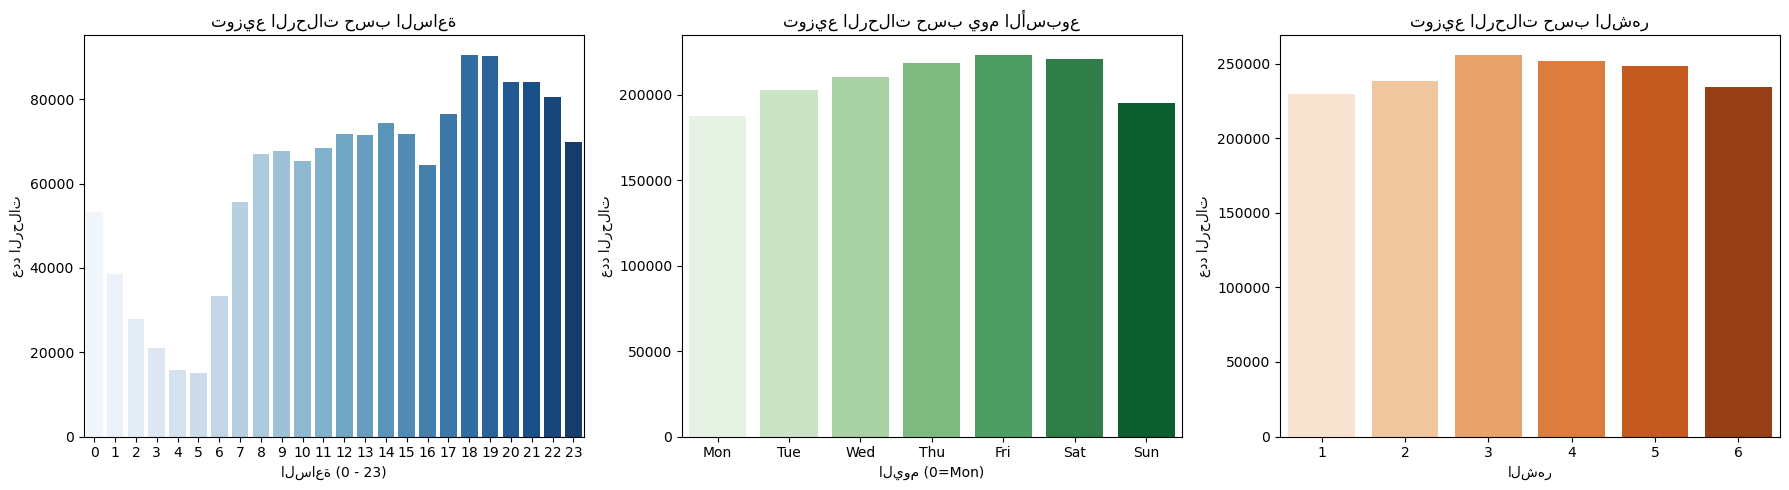

In [29]:

plt.figure(figsize=(18, 5))

# توزيع الرحلات حسب الساعة
plt.subplot(1, 3, 1)
sns.countplot(x='pickup_hour', data=data_train, palette='Blues')
plt.title('توزيع الرحلات حسب الساعة')
plt.xlabel('الساعة (0 - 23)')
plt.ylabel('عدد الرحلات')

# توزيع الرحلات حسب يوم الأسبوع
plt.subplot(1, 3, 2)
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='pickup_weekday', data=data_train, palette='Greens')
plt.title('توزيع الرحلات حسب يوم الأسبوع')
plt.xlabel('اليوم (0=Mon)')
plt.xticks(ticks=range(7), labels=weekday_labels)
plt.ylabel('عدد الرحلات')

# توزيع الرحلات حسب الشهر
plt.subplot(1, 3, 3)
sns.countplot(x='pickup_month', data=data_train, palette='Oranges')
plt.title('توزيع الرحلات حسب الشهر')
plt.xlabel('الشهر')
plt.ylabel('عدد الرحلات')

plt.tight_layout()
plt.show()


تحليل مدة الرحلة (trip_duration) بعد إزالة القيم الشاذة (Outliers)، مع توضيح الفرق حسب عدد الركاب (passenger_count).

لإزالة تأثير القيم الغريبة التي قد تخرب التحليل أو النماذج.

لملاحظة إن كان عدد الركاب يؤثر على مدة الرحلة.

لتحسين جودة البيانات قبل تدريب أي نموذج.

رسم خريطة حرارية ثنائية الأبعاد (2D Histogram) توضح العلاقة بين: 

CORELATION


مدة الرحلة (trip_duration)

مسافة الرحلة (trip_distance_meters)

مما ساعد على تحديد نمط الرحلات الطبيعية

يساعد على رؤية العلاقة المباشرة بين المسافة والمدة.

يُظهر إذا كانت هناك نمط خطي (كلما زادت المسافة زادت المدة).

يساهم في فهم البيانات قبل بناء نموذج تنبؤي

" البحث ضمن عمود عدد الركاب لكشف القيم غير المنطقية مثل وجود 0 ركاب أو أكثر من 6، وتم تحديد عدد هذه الحالات لمراجعتها أو معالجتها لاحقًا."



In [34]:
# تحليل الركاب
print("Unique passenger counts:", data_train['passenger_count'].unique())

invalid_passengers = data_train[(data_train['passenger_count'] == 0) | (data_train['passenger_count'] > 6)]
print(f"عدد الرحلات بقيم شاذة لعدد الركاب: {len(invalid_passengers)}")


Unique passenger counts: [1 6 4 2 3 5 0 7 9 8]
عدد الرحلات بقيم شاذة لعدد الركاب: 65


تحليل العلاقة بين عدد الركاب (passenger_count) و:

مدة الرحلة (trip_duration)

مسافة الرحلة (trip_distance_meters)
لمعرفة هل هناك تأثير واضح لعدد الركاب على الزمن أو المسافة.

**Machine Learning**


Linear Regression with **StandardScaler**
الانحدار الخطي يتأثر بشكل كبير بالوحدات والقيم الكبيرة.

فمثلاً: المسافة بالأمتار أكبر بكثير من عدد الركاب → هذا يخلي coefficients منحازة.

لذلك قمنا بتوحيد القيم لتكون بمتوسط = 0 وانحراف معياري = 1 (Normalization).


**F-TEST**

*why?*

هذا اختبار إحصائي بسيط يعطي فكرة سريعة عن ارتباط كل ميزة بشكل خطي مع الهدف.

مهم في مرحلة اختيار الميزات (feature selection) لتحديد المتغيرات التي تستحق الاستمرار في النمذجة.

يختلف عن أهمية الميزات من النماذج (مثل Random Forest أو Linear Regression) لأنه يعتمد فقط على اختبار إحصائي.


C:\Users\Abdulrahman\AppData\Local\Temp\ipykernel_21984\765287570.py:41: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\Abdulrahman\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


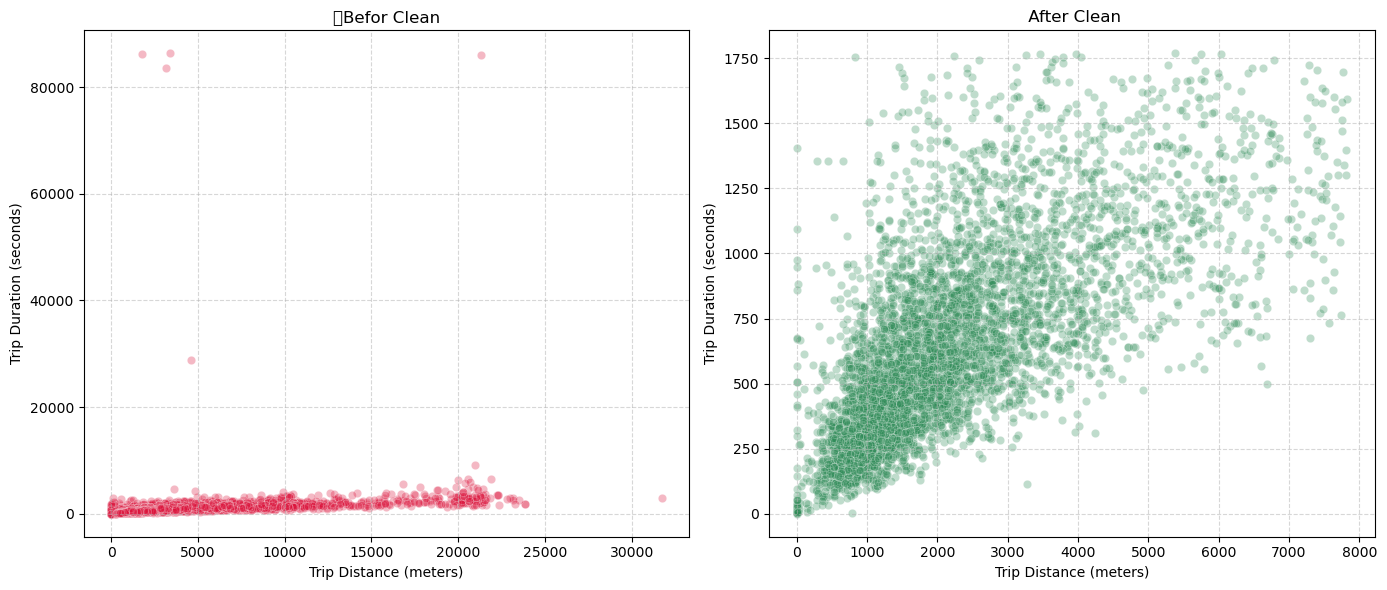

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# بيانات قبل التنظيف (نأخذ عينة عشوائية لسهولة الرسم)
sample_before = data_train.sample(5000, random_state=42)

# بيانات بعد التنظيف (نأخذ نفس العدد للمقارنة العادلة)
sample_after = data_clean.sample(5000, random_state=42)

# الشكل
plt.figure(figsize=(14, 6))

# قبل التنظيف
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=sample_before,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='crimson'
)
plt.title("🚫Befor Clean")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True, linestyle='--', alpha=0.5)

# بعد التنظيف
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=sample_after,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='seagreen'
)
plt.title(" After Clean")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


اختيار السمات تلقائيًا (Feature Selection)

اسنخدام خوارزمية CatBoost

In [59]:
# إزالة الرحلات غير المنطقية
data_clean = data_clean[(data_clean['trip_duration'] > 60) & (data_clean['trip_duration'] < 36000)]



📊 جدول مقارنة الأداء:
                 Model        RMSE         MAE        R²
0  CatBoost (Original)  195.285656  134.180246  0.811323
1     CatBoost (Tuned)  211.675023  152.240859  0.778324


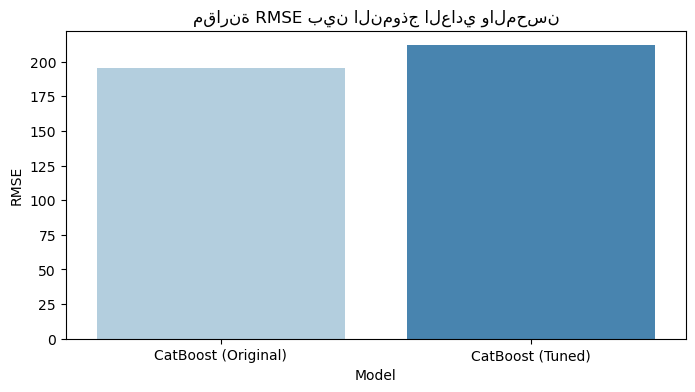

In [47]:
# حساب أداء النموذج العادي
rmse_old = mean_squared_error(y_test, y_pred, squared=False)
mae_old = mean_absolute_error(y_test, y_pred)
r2_old = r2_score(y_test, y_pred)

# إنشاء جدول المقارنة
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

compare_df = pd.DataFrame({
    'Model': ['CatBoost (Original)', 'CatBoost (Tuned)'],
    'RMSE': [rmse_old, rmse],
    'MAE': [mae_old, mae],
    'R²': [r2_old, r2]
})

# عرض جدول المقارنة
print("\n📊 جدول مقارنة الأداء:")
print(compare_df)

# رسم RMSE للمقارنة
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='RMSE', data=compare_df, palette='Blues')
plt.title("مقارنة RMSE بين النموذج العادي والمحسن")
plt.ylabel("RMSE")
plt.show()


 3. تجربة نماذج Ensemble أقوى من CatBoost فقط

✅ ماذا يحدث هنا؟
نستخدم نموذجين من CatBoost كل واحد بأفضل معاييره.

نضيف معهم XGBoost و RandomForest.

Ridge كـ final estimator حتى يجمع تنبؤاتهم بشكل خطي.

n_jobs=-1 لتسريع التدريب (يستخدم كل المعالجات المتوفرة).

#  ضبط المعاملات (Hyperparameter Tuning)

جرب LightGBM

تطبيق خوارزميات ML:
Linear Regression

Decision Tree

Random Forest

XGBoost

#  استخدام SHAP لتفسير النموذج (Feature Importance)

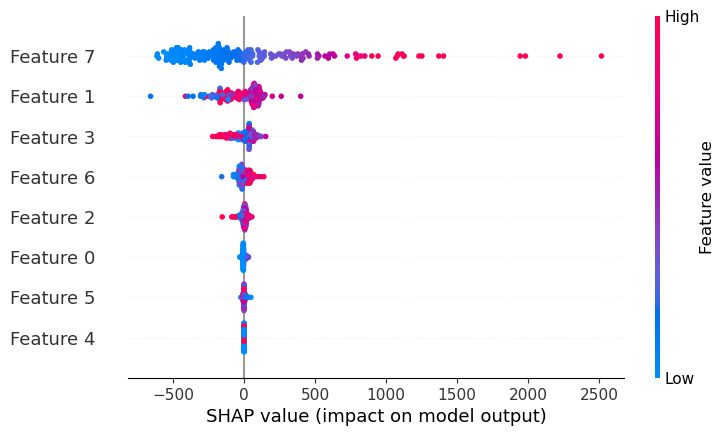

In [46]:
# 🔍 خلية 1: تفسير النموذج باستخدام مكتبة SHAP
import shap

# تجهيز explainer لنموذج XGBoost المحسن
explainer = shap.Explainer(xgb_improved, X_train_scaled)
shap_values = explainer(X_val_scaled[:200])  # التفسير لعينة صغيرة لزيادة السرعة

# رسم تأثير السمات
shap.plots.beeswarm(shap_values)


استعمال Early Stopping مع Cross-Validation

In [43]:
from catboost import Pool, cv, CatBoostRegressor

train_pool = Pool(X_train, y_train)

params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'early_stopping_rounds': 50,
    'verbose': False
}

cv_results = cv(train_pool, params, fold_count=5, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 235.466846
bestIteration = 999

Training on fold [1/5]

bestTest = 234.9529861
bestIteration = 999

Training on fold [2/5]

bestTest = 235.6469037
bestIteration = 999

Training on fold [3/5]

bestTest = 234.110561
bestIteration = 998

Training on fold [4/5]

bestTest = 235.5080266
bestIteration = 999



إنشاء Pipeline Ensemble بين CatBoost و XGBoost

In [44]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# filtered_data['pickup_minute'] = data_train['pickup_datetime'].dt.minute
# filtered_data['distance_km'] = haversine_distance(
#     data_train['pickup_latitude'],
#     data_train['pickup_longitude'],
#     data_train['dropoff_latitude'],
#     data_train['dropoff_longitude']
# )

X = filtered_data[features_enhanced]
y = filtered_data['trip_duration']  

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# المعالجة المسبقة (تحجيم للسمات العددية فقط)
# لاحظ أن CatBoost وXGBoost لا يتطلبان one-hot encoding يدوي للسمات الرقمية
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), features_enhanced)
])

# تعريف النماذج
catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    random_state=42
)

# إنشاء pipeline لكل نموذج
pipeline_cat = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', catboost_model)])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb_model)])

# تدريب النموذجين
pipeline_cat.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

# التنبؤ على مجموعة الاختبار
cat_preds = pipeline_cat.predict(X_test)
xgb_preds = pipeline_xgb.predict(X_test)

# دمج التنبؤات (Ensemble)
ensemble_preds = (cat_preds + xgb_preds) / 2

# التقييم
rmse = mean_squared_error(y_test, ensemble_preds, squared=False)
mae = mean_absolute_error(y_test, ensemble_preds)
r2 = r2_score(y_test, ensemble_preds)

print(f"Ensemble Model Results (with selected features):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")


Ensemble Model Results (with selected features):
RMSE: 211.68
MAE:  152.24
R²:   0.7783


In [42]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = filtered_data[features_enhanced]
y = filtered_data['trip_duration']  

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb = LGBMRegressor(
    n_estimators=10000,
    learning_rate=0.1,
    max_depth=9,
    random_state=42
)

lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("LightGBM Performance:")
print("RMSE:", mean_squared_error(y_test, y_pred_lgb, squared=False))
print("R²  :", r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1677
[LightGBM] [Info] Number of data points in the train set: 1107001, number of used features: 13
[LightGBM] [Info] Start training from score 731.134640
LightGBM Performance:
RMSE: 194.02338503620624
R²  : 0.8117894709104421


In [46]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

# إنشاء pipeline لكل نموذج
pipeline_cat = Pipeline(steps=[('regressor', catboost_model)])
pipeline_cat.fit(X_train, y_train)

cat_preds = pipeline_cat.predict(X_test)

print("RMSE:", mean_squared_error(y_test, cat_preds, squared=False))
print("R²  :", r2_score(y_test, cat_preds))

RMSE: 216.90338410618486
R²  : 0.764783156932901


# التأكد من عدم وجود قيم شاذة 

C:\Users\Abdulrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


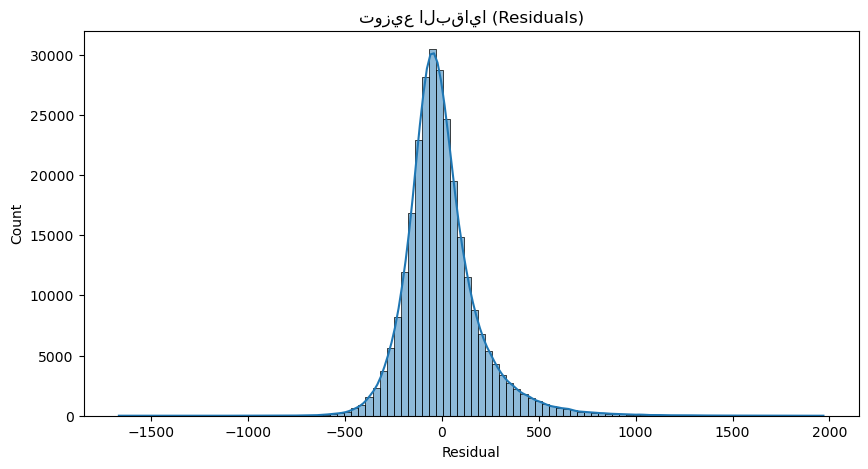

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_lgb  # أو inverse_transform إذا كنت استخدمت log

plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=100, kde=True)
plt.title('توزيع البقايا (Residuals)')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


In [42]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

et = ExtraTreesRegressor(
    n_estimators=10000,   #مماثلة لـ LightGBM
    max_depth=9,          #نفس العمق
    random_state=42,
    n_jobs=-1             #استخدام كل الأنوية المتوفرة لتسريع التدريب
)

et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

print(" ExtraTreesRegressor Performance:")
print(" RMSE:", mean_squared_error(y_test, y_pred_et, squared=False))
print(" R²  :", r2_score(y_test, y_pred_et))


🌲 ExtraTreesRegressor Performance:
  ✅ RMSE: 277.44990750371187
  ✅ R²  : 0.6191554649288007


In [43]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(
    max_iter=500,   # يشبه عدد الأشجار
    max_depth=9,
    learning_rate=0.1,
    random_state=42
)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

print("  HistGradientBoosting Performance:")
print("  RMSE:", mean_squared_error(y_test, y_pred_hgb, squared=False))
print("  R²  :", r2_score(y_test, y_pred_hgb))


  HistGradientBoosting Performance:
  RMSE: 206.59168454782514
  R²  : 0.7888436077753714
